In [3]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#
from scipy import stats 

import matplotlib.pyplot as plt
from pylab import cm
import matplotlib as mpl

from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1

In [4]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_5343/394891970.py:9: DeprecationWarning: the ``irsa`` module has been moved to astroquery.ipac.irsa, please update your imports.
  from astroquery.irsa import Irsa


In [5]:
from astroquery.ned import Ned

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_5343/863512024.py:1: DeprecationWarning: the ``ned`` module has been moved to astroquery.ipac.ned, please update your imports.
  from astroquery.ned import Ned


In [6]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=1, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=1, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=1, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=1, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)
    
def set_ax_legend_sequence(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=1, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    #by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)    
    

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)           

In [7]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [8]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

# ztfquery

In [9]:
from ztfquery import lightcurve

[ztf_api](https://irsa.ipac.caltech.edu/docs/program_interface/ztf_lightcurve_api.html)

In [9]:
!echo $ZTFDATA

In [1]:
15*7

105

In [17]:
table_=Ned.query_object('Mrk 1018')

In [25]:
table_=Ned.query_object('AT2021fxu')

In [26]:
table_

<Table length=0>
 No.  Object Name    RA     DEC    Type  ... Photometry Points Positions Redshift Points Diameter Points Associations
                  degrees degrees        ...                                                                         
int32    str30    float64 float64 object ...       int32         int32        int32           int32         int32    
----- ----------- ------- ------- ------ ... ----------------- --------- --------------- --------------- ------------

In [20]:
table_['RA'].data[0]

31.56662

os.mkdir('/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF/')

## BAT_ZTF_dir

In [20]:
CLAGN_Candidate_BAT_ZTF_dir='/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF'

In [6]:
CLAGN_Candidate_BAT_ZTF_dir

'/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF'

In [21]:
CLAGN_Candidate_BAT_ZTF_dir_1='/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF_catflags=0/'

In [8]:
CLAGN_Candidate_BAT_ZTF_dir_1

'/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF_catflags=0/'

In [22]:
CLAGN_Candidate_BAT_ZTF_dir_2='/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/CLAGN_ZTF_catflags=0/'
if not os.path.exists(CLAGN_Candidate_BAT_ZTF_dir_2):
    os.mkdir(CLAGN_Candidate_BAT_ZTF_dir_2)

In [ ]:
!open /Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF_catflags=0/

## CLAGN

### CLAGN_list202206

In [23]:
CLAGN_list202206=pd.read_excel('/Users/lyubing/IHEPBox/data/data_clagn/CLAGN-20220609.xlsx')


name='Mrk590'
result_table = Ned.query_object(name)

In [10]:
for index,name in enumerate(CLAGN_list202206['Name']):
    result_table = Ned.query_object(name)
    print(name)
    CLAGN_list202206.loc[index,'ra_deg']=result_table['RA'].data[0]
    CLAGN_list202206.loc[index,'dec_deg']=result_table['DEC'].data[0]

1ES 1927+654
1H 0419-577
2MASS J01264811-0839481       
2MASS J07451198+3809114
2MASS J09270231+0433080
2MASS J10022021+4509276       
2MASS J10520355+1519294       
2MASS J11132967+5313393
2MASS J12335916+0842112
2MASS J14284671+1723530       
2MASS J14345529+5723449
2MASS J15361278+0342457
2MASS J15373408+4613585
2MASS J16011122+4745095
2MASS J16171142+0638333
2MASS J21020044+0005020
2MASS J22053771-0711147
2MASX J08284278+4544333       
2MASX J09381221+0743398
2MASX J09483841+4030436
2MASX J10215228+4645158       
2MASX J11180325+4506463       
2MASX J16050519+4526348
2MASX J20075129-1108346
3C 390.3
ESO 362-G18
Fairall 9
HE 1136-2304
IC 751
IRAS 23226-3843
Mrk 1018
Mrk 1494
Mrk 372
Mrk 530
Mrk 590
Mrk 6
Mrk 609
Mrk 728
Mrk 883
Mrk 926
Mrk 993
NGC 1097
NGC 1346
NGC 1365
NGC 1566
NGC 2617
NGC 2622
NGC 2992
NGC 3065
NGC 3516
NGC 4051
NGC 4151
NGC 4388
NGC 4395
NGC 4507
NGC 454
NGC 4939
NGC 5548
NGC 5683
NGC 6300
NGC 7582
NGC 7674
SDSS J002311.06+003517.5      
SDSS J015957.62+003310.5

RemoteServiceError: The remote service returned the following error message.
ERROR: The object name that you have submitted is not currently recognized by the NED name interpreter.

In [ ]:
CLAGN_list202206

## CLAGN_Candidate_BAT

In [6]:
CLAGN_Candidate_BAT=pd.read_excel('/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/BAT_CLAGN_CANDIDATE.xlsx',
                                 )#dtype={'P-value':float}

In [7]:
CLAGN_Candidate_BAT

AGN    Type  Redshift  Luminosity    P-value
0                  NGC 526A  Sy 2.0    0.0191       43.78        0.0
1                  NGC 5548  Sy 1.5    0.0172       43.76        0.0
2                  NGC 4151  Sy 1.5    0.0033       43.17        0.0
3                   NGC 973  Sy 2.0    0.0162       43.46        0.0
4                  WKK 4374  Sy 1.9    0.0180       43.27   0.000001
5                  NGC 2617  Sy 1.8    0.0142       42.86   0.000014
6                  NGC 4507  Sy 1.9    0.0118       43.76   0.000075
7                      Mrk3  Sy 1.9    0.0135       43.79   0.000174
8   2MASX J04440903+2813003  Sy 2.0    0.0113       43.15   0.000255
9                  NGC 4388  Sy 2.0    0.0084       43.64  3.425E0-4
10                 NGC 2110  Sy 2.0    0.0078       43.65   0.000562
11  2MASX J10402231-4625264  Sy 2.0    0.0200       43.28   0.000584
12                  IC 4709  Sy 2.0    0.0169       43.40   0.001474
13                UGC 03601  Sy 1.9    0.0171       43.08   0.002155
14                 4C 50.55  Sy 1.2    0.0200       44.28   0.002635
15                 NGC 4235  Sy 1.2    0.0080       42.74   0.002786
16                 NGC 7679  Sy 2.0    0.0171       43.09   0.004352
17                 NGC 4945  Sy 2.0    0.0019       42.35   0.006731
18                 NGC 3281  Sy 2.0    0.0107       43.32   0.008343
19               4U 1344-60  Sy 1.9    0.0129       43.62   0.008459
20           MCG +04-48-002  Sy 2.0    0.0139       43.51   0.009586
21                 NGC 6300  Sy 2.0    0.0037       42.46    0.01056
22                 IC 4329A  Sy 1.5    0.0160       44.18    0.01145
23                 NGC 3079  Sy 2.0    0.0037       42.05    0.01145
24                  IC 2461  Sy 2.0    0.0075       42.38    0.01341
25                  NGC 788  Sy 2.0    0.0136       43.51    0.01418

In [9]:
for index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    result_table = Ned.query_object(name)
    CLAGN_Candidate_BAT.loc[index,'ra']=result_table['RA'].data[0]
    CLAGN_Candidate_BAT.loc[index,'dec']=result_table['DEC'].data[0]

In [10]:
CLAGN_Candidate_BAT#.columns

AGN    Type  Redshift  Luminosity    P-value  \
0                  NGC 526A  Sy 2.0    0.0191       43.78        0.0   
1                  NGC 5548  Sy 1.5    0.0172       43.76        0.0   
2                  NGC 4151  Sy 1.5    0.0033       43.17        0.0   
3                   NGC 973  Sy 2.0    0.0162       43.46        0.0   
4                  WKK 4374  Sy 1.9    0.0180       43.27   0.000001   
5                  NGC 2617  Sy 1.8    0.0142       42.86   0.000014   
6                  NGC 4507  Sy 1.9    0.0118       43.76   0.000075   
7                      Mrk3  Sy 1.9    0.0135       43.79   0.000174   
8   2MASX J04440903+2813003  Sy 2.0    0.0113       43.15   0.000255   
9                  NGC 4388  Sy 2.0    0.0084       43.64  3.425E0-4   
10                 NGC 2110  Sy 2.0    0.0078       43.65   0.000562   
11  2MASX J10402231-4625264  Sy 2.0    0.0200       43.28   0.000584   
12                  IC 4709  Sy 2.0    0.0169       43.40   0.001474   
13                UGC 03601  Sy 1.9    0.0171       43.08   0.002155   
14                 4C 50.55  Sy 1.2    0.0200       44.28   0.002635   
15                 NGC 4235  Sy 1.2    0.0080       42.74   0.002786   
16                 NGC 7679  Sy 2.0    0.0171       43.09   0.004352   
17                 NGC 4945  Sy 2.0    0.0019       42.35   0.006731   
18                 NGC 3281  Sy 2.0    0.0107       43.32   0.008343   
19               4U 1344-60  Sy 1.9    0.0129       43.62   0.008459   
20           MCG +04-48-002  Sy 2.0    0.0139       43.51   0.009586   
21                 NGC 6300  Sy 2.0    0.0037       42.46    0.01056   
22                 IC 4329A  Sy 1.5    0.0160       44.18    0.01145   
23                 NGC 3079  Sy 2.0    0.0037       42.05    0.01145   
24                  IC 2461  Sy 2.0    0.0075       42.38    0.01341   
25                  NGC 788  Sy 2.0    0.0136       43.51    0.01418   

           ra       dec  
0    20.97664 -35.06553  
1   214.49806  25.13679  
2   182.63574  39.40573  
3    38.58379  32.50561  
4   222.88805 -55.67733  
5   128.91162  -4.08822  
6   188.90263 -39.90926  
7    93.90152  71.03753  
8    71.03754  28.21686  
9   186.44478  12.66209  
10   88.04742  -7.45621  
11  160.09393 -46.42380  
12  276.08079 -56.36917  
13  103.95636  40.00022  
14  321.16354  50.97328  
15  184.29117   7.19158  
16  352.19459   3.51147  
17  196.36449 -49.46821  
18  157.96704 -34.85369  
19  206.89981 -60.61772  
20  307.14608  25.73333  
21  259.24779 -62.82056  
22  207.33028 -30.30944  
23  150.49085  55.67979  
24  139.99177  37.19126  
25   30.27686  -6.81552

In [ ]:
CLAGN_Candidate_BAT.head()

curl -X POST ztf.alerce.online/get_detections -d @- << EOF
{
   "oid":"ZTF18aaaadvs"
}
EOF

In [ ]:
182.63574 39.40573

In [ ]:
3.0/3600,1/3600

## skycoor_J053449

In [52]:
skycoor_J053449= SkyCoord(ra='05:34:49.2', dec='+21:26:02.9',frame="icrs", unit="deg")

In [55]:
skycoor_J053449.ra.deg,skycoor_J053449.dec.deg

(5.580333333333333, 21.43413888888889)

# ZTF

## def ztflc_show_in_jupyter

In [123]:
def ztflc_show_in_jupyter(data,name,figsize=[7,4],showtoday=False, show_upperlimits=False, formattime=False,
             marker=".", mec="0.7", ms=6, ecolor="0.7", ls="", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        marker_CODE   = [".","^","*"]
        
        save_name=name.strip().replace(' ','_')
        
        from astropy import time
        import matplotlib.pyplot as mpl
        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)
        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=figsize)
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"
            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["mag"], 
                                yerr=d["magerr"],label=filter_,
                                **{**prop,**kwargs})
        ax.invert_yaxis()
        
        if show_upperlimits:
            for filter_ in np.unique(lc_dataframe["filtercode"]):
                d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
                if filter_ in FILTER_CODE:
                    color = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
                else:
                    color = "0.7"
                if formattime:
                    dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
                else:
                    dates = d["mjd"]
                    
                ax.errorbar(dates, d["limitmag"], 
                            yerr=0.1, lolims=True,marker="None", ls="None", 
                            color=color, alpha=0.1,label=filter_
                            )
        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)
        
        
        maxmjd= max(lc_dataframe['mjd'])
        minmjd= min(lc_dataframe['mjd'])
        delta_mjd=maxmjd-minmjd
        if delta_mjd>750: 
            
            ma_intervals= 365
            min_intervals= 90
                       
        if delta_mjd<750:     
            ma_intervals= delta_mjd//3
            mi_intervals= delta_mjd//6
            
        ax.set_xlabel("MJD")
        plot_secax(ax,rotation=30,) 
        # - Labels           
        ax.set_ylabel("mag")
        #ax.set_title('%s_%s'%(name,band))
        ax.set_title('%s'%(name))
        set_ax_legend(ax,bbox_to_anchor=(0.99, 0.99))
        
        return fig,ax
        
'''     if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
'''
        #else:
        

'     if formattime:\n            from matplotlib import dates as mdates            \n            locator = mdates.AutoDateLocator()\n            formatter = mdates.ConciseDateFormatter(locator)\n            ax.xaxis.set_major_locator(locator)\n            ax.xaxis.set_major_formatter(formatter)\n            ax.set_xlabel("Date")\n'

In [ ]:
'time', 'flux', 'flux_err'

## def ztflc_plotdata_in_jupyter

In [126]:
def ztflc_plotdata_in_jupyter(data,name,filter_='zr',figsize=[7,4], formattime=False,
             marker=".", mec="0.7", ms=6, ecolor="0.7", ls="", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """

        
        save_name=name.strip().replace(' ','_')
        
        from astropy import time
        import matplotlib.pyplot as mpl
        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)
        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=figsize)
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        
        

        ax.errorbar(data['mjd'], data["mag"], 
                                yerr=data["magerr"],label=filter_,
                                **{**prop,**kwargs})
        ax.invert_yaxis()
        
        
        
        maxmjd= max(lc_dataframe['mjd'])
        minmjd= min(lc_dataframe['mjd'])
        delta_mjd=maxmjd-minmjd
        
        if delta_mjd>750: 
            
            ma_intervals= 365
            min_intervals= 90
                       
        if delta_mjd<750:     
            ma_intervals= delta_mjd//3
            mi_intervals= delta_mjd//6
            
        ax.set_xlabel("MJD")
        plot_secax(ax,rotation=30,) 
        # - Labels           
        ax.set_ylabel("mag")
        #ax.set_title('%s_%s'%(name,band))
        ax.set_title('%s'%(name))
        set_ax_legend(ax,bbox_to_anchor=(0.99, 0.99))
        
        return fig,ax
        
'''     if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
'''
        #else:
        

'     if formattime:\n            from matplotlib import dates as mdates            \n            locator = mdates.AutoDateLocator()\n            formatter = mdates.ConciseDateFormatter(locator)\n            ax.xaxis.set_major_locator(locator)\n            ax.xaxis.set_major_formatter(formatter)\n            ax.set_xlabel("Date")\n'

## def ztflc_show

In [48]:
def ztflc_savepng(data,name,band, showtoday=False, show_upperlimits=False, formattime=True,
             marker="o", mec="0.7", ms=7, ecolor="0.7", ls="None", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        save_name=name.strip().replace(' ','_')
        

        from astropy import time
        import matplotlib.pyplot as mpl

        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)

        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=[7,4])
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"

            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["mag"], 
                                yerr=d["magerr"],
                                **{**prop,**kwargs})

        ax.invert_yaxis()
        
        if show_upperlimits:
            for filter_ in np.unique(lc_dataframe["filtercode"]):
                d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
                if filter_ in FILTER_CODE:
                    color = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
                else:
                    color = "0.7"

                if formattime:
                    dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
                else:
                    dates = d["mjd"]
                    
                ax.errorbar(dates, d["limitmag"], 
                            yerr=0.1, lolims=True,marker="None", ls="None", 
                            color=color, alpha=0.1,
                            )

        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)

        if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
        else:
            ax.set_xlabel("MJD")
        # - Labels

        ax.set_ylabel("mag")
        ax.set_title('%s_%s'%(name,band))
        
        fig.savefig('%s/%s_%s.png'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band),
                   dpi=400, transparent=False, bbox_inches='tight')
        mpl.close()
        
        

## ZTF_download

In [184]:
def ZTF_download_lamost(obsid_i,ra,dec,path=lamostdr10_12_matchSDSS_ztfdata):


    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    #for band in ztf_bands:
    if not os.path.exists('%s/%s.csv'%(path,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                          dec,2.0/3600], 
                                                           #bandname=band,
                                                           BAD_CATFLAGS_MASK=32768)
        pd_ztf_i=data_g
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

        if len(pd_ztf_i_zg)>0 and len(pd_ztf_i_zr)>0:                
                data_g.to_csv('%s/%s.csv'%(path,save_name),index=False) 
                time.sleep(1+np.random.randint(3,10))  


## NGC 4151

In [12]:
Name_index=2
print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

NGC 4151
182.63574 39.40573


In [13]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN'

In [14]:
ls

BAT150month.ipynb
BAT_105m_catalog_07jul2019.ipynb*
CLAGN_Candidate_BAT_ZTF.ipynb*
CLAGN_crossmatch.ipynb*
CLAGN_ned_data/
CLAGN_py3ads_adstex_arxiv.ipynb*
CLAGN_wise_data/
CLANG_statistic_for_data_planing.ipynb*
Irsa_wise_astroquery.ipynb*
Javelin_CCF_timelag.ipynb*
LAMOST_CLAGN_Search.ipynb
LLAGN_NED_name_redshift_search.ipynb*
OXCLAGN_NuSTAR/
QSO_wise.ipynb*
Readme.md*
Readme.py*
Search data with CasJobs.ipynb
Untitled.ipynb
WISE_LLAGN_Quasar.ipynb*
WISE_data_plot_hist.ipynb*
WISE_download_plot.ipynb*
WISE_timelag_lc.ipynb*
ZTF_WWZ_timing_linjie.ipynb*
changinglook_agn_list_ned_data_vla.ipynb*
output/
ztf_data_r_mjd_mag_magerr.txt*


NGC 4151
182.63574 39.40573


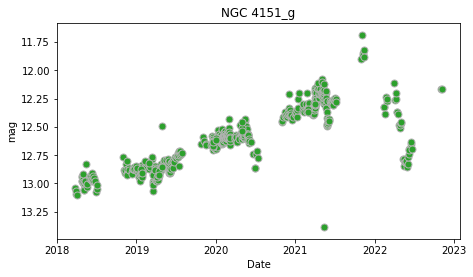

In [22]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='g'

data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_g,name,band)

#lc_g = lightcurve.LCQuery(data_g)
#lc_g.show()

In [23]:
oids=[]
for oid in data_g['oid']:
    if oid not in oids:
        oids.append(oid)

In [24]:
oids

[715107400005470, 1713113300001769]

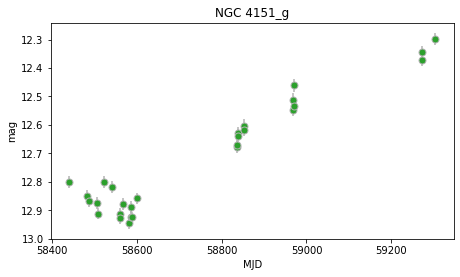

In [30]:
ztflc_show_in_jupyter(data_g[data_g['oid']==1713113300001769],name,band,formattime=False)


In [31]:
ztflc_show_in_jupyter(data_g[data_g['oid']==715107400005470],name,band,formattime=False)


In [ ]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='r'


data_r = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_r,name,band)

#lc_g = lightcurve.LCQuery(data_g)
#lc_g.show()

In [ ]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='i'


data_i = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_i,name,band)

#lc_g = lightcurve.LCQuery(data_g)
#lc_g.show()

## BAT150m

In [32]:
BAT_150month_catalog=pd.read_csv('/Users/lyubing/IHEPBox/data/AGNmass/BAT_150mdata/BAT_150month_catalog.csv')

In [33]:
BAT_150month_data=pd.read_csv('/Users/lyubing/IHEPBox/data/AGNmass/BAT_150mdata/BAT_150month_data.csv')

In [34]:
BAT_150month_data_CTAGN=pd.read_csv('/Users/lyubing/IHEPBox/data/AGNmass/BAT_150mdata/BAT_150month_data_CTAGN.csv')

In [40]:
BAT_150month_catalog_zlessthan0dot3=BAT_150month_catalog[BAT_150month_catalog['z']<0.3]
BAT_150month_catalog_zlessthan0dot3=drop_index(BAT_150month_catalog_zlessthan0dot3)

In [41]:
BAT_150month_catalog_zlessthan0dot3

SRC_NAME TYPE     RA_OBJ    DEC_OBJ       BAT_NAME  \
0    [VV2010c] J171245.9+291715  Sy2  258.19100  29.287600   J1712.7+2921   
1                  1E 0412-0803  Sy1   63.71900  -7.928000  4PBC J0414.8-   
2                1E 0459.5+0327  Sy1   75.53746   3.530810  4PBC J0502.2+   
3                  1ES 0054+145  Sy1   14.29142  14.769470  4PBC J0057.0+   
4                  1ES 0120+340  BLA   20.78600  34.347000  4PBC J0123.1+   
..                          ...  ...        ...        ...            ...   
639                   UGC 12348  Sy2  346.32800   0.189360   J2305.2+0008   
640                    UGC 3142  Sy1   70.94537  28.971945  4PBC J0443.7+   
641                    UGC 3478  Sy1   98.19517  63.673280  4PBC J0632.2+   
642                      Was 49  Sy1  183.57420  29.528723  4PBC J1214.2+   
643                     Z 77-21  AGN  227.28700   9.039050   J1509.2+0903   

         RA_BAT    DEC_BAT    OFFSET  ERR_RADIUS_95   MEAN_SIG    GAL_LONG  \
0    258.195130  29.359715  4.332259       4.878922   5.021983   51.704369   
1     63.721054  -7.919921  0.499823       1.243918  17.725725  200.992722   
2     75.571900   3.522090  2.127763       1.921829  10.860053  196.397705   
3     14.252778  14.749410  2.544672       3.019567   7.001356  124.949707   
4     20.776463  34.365820  1.224119       1.818483  11.584393  130.333847   
..          ...        ...       ...            ...        ...         ...   
639  346.310580   0.143326  2.953213       4.140682   5.708478   75.542559   
640   70.936300  28.970776  0.481311       0.957603  25.153960  172.084641   
641   98.053770  63.687393  3.855660       2.145678   9.178567  151.397110   
642  183.557700  29.540707  1.122427       1.767993  12.360718  194.337616   
643  227.324940   9.058040  2.520103       4.123674   5.509198   10.401533   

       GAL_LAT      z  
0    33.163864  0.105  
1   -38.259804  0.037  
2   -22.286486  0.016  
3   -48.100506  0.171  
4   -28.050369  0.272  
..         ...    ...  
639 -52.631769  0.030  
640 -11.002903  0.022  
641  22.066868  0.012  
642  81.467651  0.064  
643  52.808695  0.045  

[644 rows x 13 columns]

In [37]:
len(BAT_150month_data)

30

In [35]:
BAT_150month_data_CTAGN

Name        z          RA        DEC  \
0   2MASX J01073963-1139117  0.04746   16.915167 -11.653222   
1                   NGC 424  0.01180   17.865290 -38.083510   
2                  NGC 1068  0.00380   40.669880  -0.013290   
3               2MFGC 02280  0.01520   42.677500  54.704920   
4                  NGC 1142  0.02885   43.800817  -0.183557   
5                ESO 116-18  0.01850   51.221042 -60.738444   
6                  NGC 1358  0.01344   53.415303   5.089401   
7                 ESO 201-4  0.03590   57.599080 -50.309850   
8              CGCG 420-015  0.02940   73.357340   4.061580   
9             ESO 005-G 004  0.00620   91.423840 -86.631950   
10             ESO 426-G002  0.02243   95.943417 -32.216583   
11              LEDA 478026  0.04100  104.049900 -49.330540   
12             ESO 565-G019  0.01630  143.681550 -21.927840   
13           MCG +10-14-025  0.03940  143.965390  61.352920   
14                 NGC 3079  0.00370  150.490850  55.679790   
15                 NGC 3281  0.01067  157.967042 -34.853694   
16                 NGC 3393  0.01250  162.097780 -25.162030   
17               ESO 323-32  0.01600  193.334730 -41.635650   
18                 NGC 4945  0.00190  196.363660 -49.467900   
19          Circinus Galaxy  0.00140  213.291270 -65.339020   
20                 NGC 5643  0.00400  218.169910 -44.174610   
21                 NGC 5728  0.00930  220.599700 -17.253170   
22            ESO 137-G 034  0.00900  248.808810 -58.080030   
23                 NGC 6240  0.02450  253.245250   2.400990   
24                 NGC 6552  0.02650  270.030460  66.615110   
25                 NGC 6921  0.01450  307.146090  25.733380   
26                 NGC 7130  0.01620  327.081210 -34.951310   
27           NGC 7212 NED02  0.02670  331.758300  10.233470   
28                 NGC 7479  0.00790  346.236120  12.322880   
29             CGCG 475-040  0.03500  346.953600  22.710300   
30                 NGC 7582  0.00520  349.598420 -42.370570   
31                 NGC 7674  0.02892  351.986352   8.779035   

             Reference  
0            Zhao+2020  
1          Marchesi+18  
2          Marchesi+18  
3   Georgantopoulos+19  
4            Zhao+2020  
5          Marchesi+18  
6          Marchesi+18  
7          Marchesi+18  
8          Marchesi+18  
9          Marchesi+18  
10      Torres-Albà+21  
11      Torres-Albà+21  
12           Traina+21  
13              Oda+17  
14         Marchesi+18  
15           Zhao+2020  
16         Marchesi+18  
17      Torres-Albà+21  
18         Marchesi+18  
19          Arevalo+14  
20         Marchesi+18  
21           Zhao+2020  
22  Georgantopoulos+19  
23         Marchesi+18  
24      Torres-Albà+21  
25             Koss+16  
26         Marchesi+18  
27         Marchesi+18  
28         Marchesi+18  
29      Torres-Alba+21  
30         Marchesi+18  
31           Zhao+2019

## million quasar

## save_ztf_lc

In [11]:
CLAGN_Candidate_BAT_ZTF_dir

NameError: name 'CLAGN_Candidate_BAT_ZTF_dir' is not defined

In [44]:
os.listdir(CLAGN_Candidate_BAT_ZTF_dir)

['NGC_526A_g.csv',
 'NGC_526A_i.csv',
 'NGC_526A_r.csv',
 'NGC_5548_g.csv',
 'NGC_5548_i.csv',
 'NGC_5548_r.csv',
 'NGC_4151_g.csv',
 'NGC_4151_i.csv',
 'NGC_4151_r.csv',
 'NGC_973_g.csv',
 'NGC_973_i.csv',
 'NGC_973_r.csv',
 'WKK_4374_g.csv',
 'WKK_4374_i.csv',
 'WKK_4374_r.csv',
 'NGC_2617_g.csv',
 'NGC_2617_i.csv',
 'NGC_2617_r.csv',
 'NGC_4507_g.csv',
 'NGC_4507_i.csv',
 'NGC_4507_r.csv',
 'Mrk3_g.csv',
 'Mrk3_i.csv',
 'Mrk3_r.csv',
 '2MASX_J04440903+2813003_g.csv',
 '2MASX_J04440903+2813003_i.csv',
 '2MASX_J04440903+2813003_r.csv',
 'NGC_4388_g.csv',
 'NGC_4388_i.csv',
 'NGC_4388_r.csv',
 'NGC_2110_g.csv',
 'NGC_2110_i.csv',
 'NGC_2110_r.csv',
 '2MASX_J10402231-4625264_g.csv',
 '2MASX_J10402231-4625264_i.csv',
 '2MASX_J10402231-4625264_r.csv',
 'IC_4709_g.csv',
 'IC_4709_i.csv',
 'IC_4709_r.csv',
 'UGC_03601_g.csv',
 'UGC_03601_i.csv',
 'UGC_03601_r.csv',
 '4C_50.55_g.csv',
 '4C_50.55_i.csv',
 '4C_50.55_r.csv',
 'NGC_4235_g.csv',
 'NGC_4235_i.csv',
 'NGC_4235_r.csv',
 'NGC_7679_g.

In [43]:
ztf_bands=['g','i','r']

for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')
    
    for band in ztf_bands:
        if not os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)):
            data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                                  bandname=band,BAD_CATFLAGS_MASK=32768)
            data_g.to_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band),index=False) 
            time.sleep(1+np.random.randint(2,5))  
        else:
            time.sleep(1)
    

In [ ]:
len(CLAGN_Candidate_BAT)

In [ ]:
26*3

NGC 4151


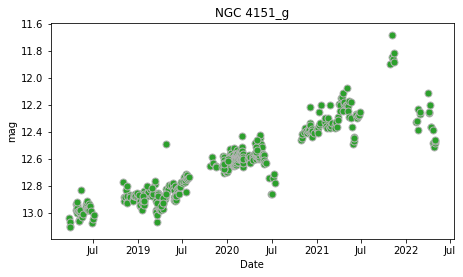

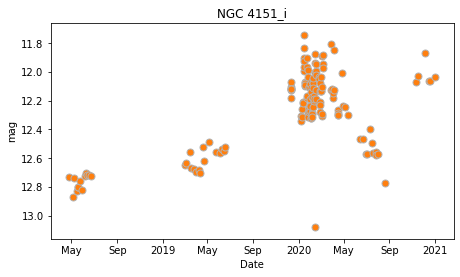

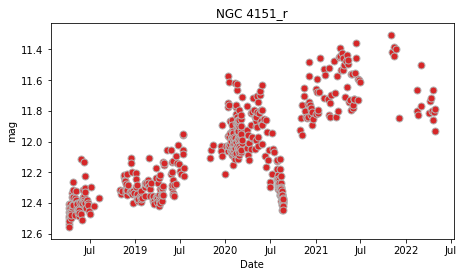

In [50]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
print(name)
save_name=name.strip().replace(' ','_')
band=ztf_bands[0]
#
for band in ztf_bands:
    if os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)):
        data=pd.read_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)) 
         #ztflc_savepng(data,name,band)
        #ztflc_show_in_jupyter(data,name,band,formattime=False)    
        ztflc_show_in_jupyter(data,name,band)

for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')    
    for band in ztf_bands:
        if os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)):
            data=pd.read_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)) 
             ztflc_savepng(data,name,band)

In [ ]:
ztflc_show(data,name,band)

In [ ]:
data.columns

In [ ]:
lc_g.#.data

In [ ]:
data_i = lightcurve.LCQuery.download_data(circle=[299.412,50.55500,0.0014], bandname="i",BAD_CATFLAGS_MASK=15)

In [ ]:
data_r_3arcsec= lightcurve.LCQuery.download_data(circle=[299.412,50.55500,3.0/3600], bandname="r",BAD_CATFLAGS_MASK=15)
print(len(data_r_3arcsec))

## BAD_CATFLAGS_MASK=0

In [ ]:
CLAGN_Candidate_BAT_ZTF_dir_1

In [ ]:
for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')
    
    for band in ztf_bands:
        if not os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_1,save_name,band)):
            data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                              CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                                  bandname=band,BAD_CATFLAGS_MASK=0)
            data_g.to_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_1,save_name,band),index=False) 
            time.sleep(1+np.random.randint(2,5))  
        else:
            time.sleep(1)
    

## save CLAGN_list data

In [12]:
CLAGN_Candidate_BAT_ZTF_dir_2='/Volumes/ExtremeSSD/data_source/ZTFdata/CLAGNztf/20230703/'

In [13]:
print(CLAGN_Candidate_BAT_ZTF_dir_2)

/Volumes/ExtremeSSD/data_source/ZTFdata/CLAGNztf/20230703/


In [14]:
len(CLAGN_list202206)

185

In [ ]:
data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                      dec,2.0/3600], 
                                                       #bandname=band,
                                                       BAD_CATFLAGS_MASK=32768)

In [23]:
for Name_index,name in enumerate(CLAGN_list202206['Name']):
    save_name=name.strip().replace(' ','_')
    
    #for band in ztf_bands:
    if not os.path.exists('%s/%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_list202206.loc[Name_index,'ra_deg'],
                                                          CLAGN_list202206.loc[Name_index,'dec_deg'],2.0/3600], 
                                                           #bandname=band,
                                                           BAD_CATFLAGS_MASK=32768)
        if len(data_g)>10:
            data_g.to_csv('%s/%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name),index=False) 
            time.sleep(1+np.random.randint(3,10))  
    else:
        time.sleep(2)
    

for Name_index,name in enumerate(CLAGN_list202206['Name']):
    save_name=name.strip().replace(' ','_')
    
    if not os.path.exists('%s/%s_gir.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_list202206.loc[Name_index,'ra_deg'],
                                                          CLAGN_list202206.loc[Name_index,'dec_deg'],1.0/3600], 
                                              bandname='g,i,r',BAD_CATFLAGS_MASK=0)
        data_g.to_csv('%s/%s_gir.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name),index=False) 
        time.sleep(1+np.random.randint(3,10))  
    else:
        time.sleep(2)
    

In [15]:
!ls /Volumes/ExtremeSSD/data_source/ZTFdata/CLAGNztf/20230703/*.csv | wc -l

     135


In [16]:
CLAGN_list202206

Name                     Note             RA  \
0                      1ES 1927+654                      NaN   19h27m19.54s   
1                       1H 0419-577                      NaN  04h26m00.724s   
2    2MASS J01264811-0839481                             NaN  01h26m48.088s   
3           2MASS J07451198+3809114                      NaN  07h45m11.983s   
4           2MASS J09270231+0433080                      NaN  09h27m02.304s   
..                              ...                      ...            ...   
180       ﻿SDSS J133806.59−012412.8                      CLQ            NaN   
181                         Mrk 766                 NGC 4253   12h18m26.51s   
182              SWIFT J2127.4+5654    LQAC 321+056 001        21h27m44.95s   
183                        NGC 6841                 NGC 6841   19h57m49.06s   
184                    LEDA 1154204  6dFGS gJ042838.8-000040            NaN   

               DEC                 Ref.             Type_Ref  Redshift  \
0     +65d33m54.2s     arxiv:1903.11084  2019ApJ...883...94T  0.017000   
1    -57d12m00.97s      arxiv:1201.2169  2012MNRAS.421.1803M  0.104000   
2    -08d39m48.08s     arxiv:1509.03634  2016ApJ...826..188R  0.197910   
3    +38d09m11.30s     arxiv:1810.00087  2019ApJ...874....8M  0.236480   
4    +04d33m08.20s     arxiv:1810.00087  2019ApJ...874....8M  0.321790   
..             ...                  ...                  ...       ...   
180            NaN                  NaN  2023ApJ...953...61Y  0.452000   
181   +29d48m46.3s                  NaN  2011MNRAS.410.1027R  0.012882   
182   +56d56m39.7s                  NaN  2013MNRAS.436.1588S  0.014000   
183   -31d48m38.5s                  NaN  2021ApJ...908L..33G  0.019490   
184            NaN  2023arXiv230908956S                  NaN       NaN   

     lg(MBH/Msun)            Ref..1             mass_Ref  ... E(B-V)mean  \
0            7.30  arxiv:2011.01954  2021MNRAS.502L..50S  ...      0.089   
1            8.58   arxiv:1401.5614  2014A&A...563A..95D  ...      0.015   
2            8.08  arxiv:1903.02553  2019ApJ...883...76R  ...      0.034   
3            9.10  arxiv:1905.02262  2020MNRAS.491.4925G  ...      0.058   
4             NaN               NaN                  NaN  ...      0.046   
..            ...               ...                  ...  ...        ...   
180           NaN               NaN                  NaN  ...        NaN   
181           NaN               NaN                  NaN  ...        NaN   
182           NaN               NaN                  NaN  ...        NaN   
183           NaN               NaN                  NaN  ...        NaN   
184           NaN               NaN                  NaN  ...        NaN   

    E(B-V)weighted       NHImean   NHIweighted       NH2mean   NH2weighted  \
0            0.088  6.940000e+20  6.870000e+20  2.260000e+20  2.230000e+20   
1            0.014  1.290000e+20  1.260000e+20  5.430000e+18  5.110000e+18   
2            0.032  3.030000e+20  2.930000e+20  3.440000e+19  3.150000e+19   
3            0.055  5.060000e+20  4.830000e+20  1.070000e+20  9.540000e+19   
4            0.047  3.150000e+20  3.130000e+20  4.950000e+19  5.110000e+19   
..             ...           ...           ...           ...           ...   
180            NaN           NaN           NaN           NaN           NaN   
181            NaN           NaN           NaN           NaN           NaN   
182            NaN           NaN           NaN           NaN           NaN   
183            NaN           NaN           NaN           NaN           NaN   
184            NaN           NaN           NaN           NaN           NaN   

       NH,totmean  NH,totweighted     ra_deg   dec_deg  
0    9.200000e+20    9.100000e+20  291.83142  65.56506  
1    1.340000e+20    1.310000e+20   66.50302 -57.20027  
2    3.370000e+20    3.250000e+20   21.70037  -8.66335  
3    6.130000e+20    5.790000e+20  116.29993  38.15314  
4    3.650000e+20    3.650000e+20  141.75960   4.55228  
.

# LAMOST_ZTF

## download lamost qso

In [10]:
lamostdr10_12_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'
if not os.path.exists(lamostdr10_12_ztfdata):
    os.mkdir(lamostdr10_12_ztfdata)

In [11]:
lamostdr10_12_ztfdata

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'

In [15]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    5748


In [12]:
import pandas as pd
#pd_asera_QSOandCandidates=pd.read_csv('/Users/lyubing/Downloads/pd_asera_dr11and12_QSOandCandidates.csv')
pd_asera_QSOandCandidates=pd.read_csv('/Users/lyubing/Downloads/pd_asera_dr11and12_QSOandCandidates.csv')

In [13]:
len(pd_asera_QSOandCandidates)

4622

In [14]:
pd_asera_QSOandCandidates

#cols: spUrl templateGroup  \
0     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
2     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
3     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
...                                                 ...           ...   
4617  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4618  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4619  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4620  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4621  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   

       templateName         z  targetID       objra     objdec userClass  \
0     qso_model.csv  1.349603       NaN   44.355063   6.762051      QSO?   
1     qso_model.csv  1.285930       NaN   42.306392   6.907892      QSO?   
2     qso_model.csv  1.404615       NaN   42.557990   7.248858      QSO?   
3     qso_model.csv  1.087094       NaN   42.271892   7.136188       QSO   
4     qso_model.csv  0.572734       NaN   42.242792   6.695453      QSO?   
...             ...       ...       ...         ...        ...       ...   
4617  qso_model.csv  1.268869       NaN  223.015538  14.891406      QSO?   
4618  qso_model.csv  1.632632       NaN  222.570660  15.264842      QSO?   
4619  qso_model.csv  2.035611       NaN  225.141480  16.245053       QSO   
4620  qso_model.csv  1.571779       NaN  224.100960  15.687407       QSO   
4621  qso_model.csv  1.520188       NaN  223.831440  16.956773       QSO   

      userComments  label  
0              NaN    2.0  
1              NaN    2.0  
2              NaN    2.0  
3              NaN    0.0  
4              NaN    2.0  
...            ...    ...  
4617           NaN    2.0  
4618           NaN    2.0  
4619           NaN    0.0  
4620           NaN    0.0  
4621           NaN    0.0  

[4622 rows x 10 columns]

In [38]:
len(pd_asera_QSOandCandidates)+1427

6049

dr11_q3= pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR11/DR11_q3/result/asera_check_results_dr11_q3.csv') 

for index,path in enumerate(dr11_q3['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
    
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
    if not os.path.exists('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)):
        print(index,obsid_i)

for index,path in enumerate(dr11_q3['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
    
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
    if not os.path.exists('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                          dec,2.0/3600], 
                                                           #bandname=band,
                                                           BAD_CATFLAGS_MASK=32768)
            
        pd_ztf_i=data_g
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

        if len(pd_ztf_i_zg)>0 and len(pd_ztf_i_zr)>0:                
                data_g.to_csv('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name),index=False) 
                time.sleep(1+np.random.randint(3,10))  
        else:
            print(index,save_name)
            #time.sleep(2)

for index,path in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
    
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
    #for band in ztf_bands:
    if not os.path.exists('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)):
        print(obsid_i)

In [ ]:
name,ra,dec

In [ ]:
for name,ra,dec

if not os.path.exists('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)):
    try:
        data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                          dec,2.0/3600], 
                                                           #bandname=band,
                                                           BAD_CATFLAGS_MASK=32768)
        
        if len(data_g)>5:
            data_g.to_csv('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name),index=False) 
            time.sleep(10+np.random(1,3))           
    exceptp as e:
        print(e)

In [46]:
for index,path in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
    
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
    #for band in ztf_bands:
    if not os.path.exists('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                          dec,2.0/3600], 
                                                           #bandname=band,
                                                           BAD_CATFLAGS_MASK=32768)
            
        pd_ztf_i=data_g
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

        if len(pd_ztf_i_zg)>0 and len(pd_ztf_i_zr)>0:                
                data_g.to_csv('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name),index=False) 
                time.sleep(1+np.random.randint(3,10))  
        else:
            print(index,save_name)
            #time.sleep(2)

25 id937812105ra45.60576_dec10.02769
141 id948805173ra143.19367_dec15.53964
153 id948809196ra145.43437_dec17.06064
167 id948813134ra146.29346_dec16.95122
168 id948813143ra146.30575_dec17.12854
210 id949707015ra75.76135_dec10.07962
216 id949901104ra45.73807_dec45.47209
242 id950313070ra10.54126_dec23.48996
260 id961207206ra61.36798_dec4.16413
268 id963601015ra174.92533_dec6.51312
300 id964609094ra200.23356_dec2.70913
310 id964615203ra199.09498_dec2.66902
353 id965309047ra149.19257_dec38.76953
358 id965401015ra174.92533_dec6.51310
379 id965406153ra176.96141_dec7.43814
391 id965411231ra174.64254_dec9.84751
394 id965413059ra176.68215_dec8.20788
399 id965416142ra174.03857_dec10.03869
417 id966112125ra66.83378_dec-0.97807
432 id966307069ra113.24197_dec13.67856
439 id966311188ra112.18699_dec17.04387
440 id966312070ra113.17883_dec17.05359
452 id966402089ra154.95704_dec15.51593
456 id966403086ra155.22646_dec16.96335
482 id966410161ra154.97311_dec16.13190
520 id974202133ra203.38697_dec6.49293
52

4364 id1113102236ra225.61531_dec20.98266
4386 id1113115080ra225.90954_dec23.58341
4389 id1113116126ra225.94935_dec24.45157
4390 id1113701016ra214.66119_dec2.02129
4391 id1113701033ra214.62336_dec1.78453
4397 id1113702062ra212.92048_dec2.68547
4398 id1113702088ra212.72691_dec2.26383
4407 id1113703076ra213.27120_dec3.61669
4412 id1113705099ra214.40952_dec2.57406
4417 id1113705150ra214.68828_dec3.06527
4418 id1113705215ra213.69547_dec2.58463
4421 id1113706008ra216.25002_dec2.67757
4425 id1113706206ra216.34345_dec2.71106
4426 id1113707146ra215.55527_dec1.71027
4435 id1113708181ra215.10675_dec2.70785
4447 id1113710112ra212.80613_dec3.02149
4464 id1113714019ra212.73069_dec4.88706
4466 id1113714091ra213.25270_dec4.47977
4467 id1113714133ra212.85795_dec4.64336
4471 id1113715024ra214.58009_dec4.69308
4475 id1113715193ra214.59556_dec4.42601
4484 id1113801087ra228.27258_dec3.49055
4485 id1113801092ra228.28061_dec3.58450
4487 id1113802097ra226.47727_dec3.56620
4494 id1113804159ra228.34340_dec5.212

for index,path in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
    
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
    path_ztf_i='%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)

    if os.path.exists(path_ztf_i):
        #print(save_name)
        pd_ztf_i=pd.read_csv(path_ztf_i)           
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

        if len(pd_ztf_i_zg)<1:
            #print('rm %s'%path_ztf_i)
            os.remove(path_ztf_i)
            #os.system('rm %s'%path_ztf_i)
        elif len(pd_ztf_i_zr)<1:
            #print('rm %s'%path_ztf_i)
            #os.system('rm %s'%path_ztf_i) 
            os.remove(path_ztf_i)
        #elif len(pd_ztf_i_zi)<1:
            #print('rm %s'%path_ztf_i)
            #os.system('rm %s'%path_ztf_i) 
            #os.remove(path_ztf_i)  

In [21]:
lamostdr10_12_ztfdata

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'

In [28]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    4280


In [29]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    4280


In [50]:
for index,path in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
       
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    print('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name))

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937801018ra44.35506_dec6.76205.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802019ra42.30639_dec6.90789.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802054ra42.55799_dec7.24886.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802059ra42.27189_dec7.13619.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802087ra42.24279_dec6.69545.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802213ra43.34877_dec6.52982.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802222ra43.32375_dec6.39050.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802227ra42.95822_dec6.81634.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937803013ra43.31851_dec7.85917.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937803085ra42.82207_dec8.24906.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937804044ra43.89645_dec8.92669.csv

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813046ra146.75067_dec16.72498.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813103ra145.95115_dec17.48579.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813134ra146.29346_dec16.95122.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813143ra146.30575_dec17.12854.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813148ra146.11978_dec16.98936.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948815195ra143.89074_dec17.04575.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948815203ra143.73456_dec17.91665.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948816070ra143.32399_dec18.19709.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948816078ra142.79999_dec17.58207.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948816088ra142.55318_dec17.61570.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948816106ra143

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965208230ra111.44698_dec17.06815.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965209035ra111.80610_dec18.12224.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965209199ra111.85489_dec18.33366.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965209203ra111.48907_dec17.91866.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965209212ra111.71945_dec17.79211.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965211011ra110.38520_dec19.26013.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965211075ra111.23602_dec19.31117.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965211111ra111.17040_dec19.59361.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965212139ra111.35087_dec19.10914.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965213061ra113.00484_dec17.44057.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965213173ra112

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973910245ra95.98000_dec43.03750.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973913048ra101.81543_dec44.00672.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973914033ra95.76483_dec43.95182.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973914063ra96.77824_dec43.98639.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973915054ra97.77493_dec44.54290.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974201056ra203.60848_dec6.38533.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974201056ra203.60848_dec6.38533.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974202133ra203.38697_dec6.49293.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974202223ra202.92595_dec6.42603.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974203121ra202.70102_dec8.67756.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974207213ra204.49303_de

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980305044ra211.29691_dec11.35240.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980305149ra211.25672_dec11.80290.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980308218ra211.49253_dec11.33348.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980309157ra211.33106_dec13.61086.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980311156ra210.28271_dec14.82358.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980311159ra210.41454_dec14.97418.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980311178ra210.80149_dec14.59711.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980315063ra209.79863_dec13.57051.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980316156ra209.69291_dec14.05679.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id988701002ra200.05346_dec-0.54978.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id988701036ra199

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991015107ra209.37468_dec25.79891.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991015122ra209.57020_dec25.83037.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991015192ra209.19956_dec25.82492.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991015213ra209.07415_dec26.42467.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991016115ra208.85604_dec26.68352.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991016117ra208.72619_dec26.77064.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991016143ra208.33671_dec26.86371.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991104055ra243.47250_dec-1.54174.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991201079ra118.67340_dec10.79767.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991202116ra117.26817_dec10.62845.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991202180ra117

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993406082ra160.29086_dec-4.40778.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993406096ra160.45532_dec-4.24716.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407028ra160.11660_dec-5.74921.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407042ra160.12615_dec-5.71276.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407056ra159.69939_dec-5.24523.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407081ra160.47519_dec-5.33873.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407094ra160.31936_dec-5.31735.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407236ra160.10942_dec-5.38419.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993408034ra159.43887_dec-3.96867.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993408063ra159.97683_dec-4.41885.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993408102ra159

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995809126ra190.54254_dec4.55034.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995809181ra190.55311_dec4.73776.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995811061ra190.03174_dec6.12681.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995811088ra189.41571_dec6.03158.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995811090ra189.23849_dec6.01875.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995811096ra189.21469_dec6.01046.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995812095ra190.49107_dec5.64248.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995813008ra191.69873_dec4.71725.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995813129ra191.42333_dec4.82256.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995813178ra191.82587_dec5.04562.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995813228ra190.95886_dec

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998413230ra215.38462_dec24.17561.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998413238ra215.35694_dec24.22876.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998414188ra211.62602_dec23.91854.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998414207ra211.93831_dec24.39035.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415040ra213.83897_dec24.96216.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415049ra213.65095_dec24.98447.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415057ra212.63056_dec24.51841.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415096ra212.85650_dec24.74215.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415143ra214.02168_dec24.76047.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998416032ra211.99270_dec25.38524.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998607017ra133

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1002216072ra187.01943_dec-0.08529.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1002701088ra266.48201_dec4.07386.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1002709202ra267.18478_dec6.12860.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1002716226ra265.48920_dec7.74304.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003102103ra213.46760_dec1.71111.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003102107ra213.36921_dec1.77554.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003103013ra213.88090_dec3.18438.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003103052ra213.18203_dec3.90247.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003103109ra213.29915_dec4.04833.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003104005ra214.44498_dec3.41573.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003106206ra2

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009714172ra226.64587_dec5.58429.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009714237ra226.29632_dec5.62410.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715009ra228.18049_dec6.18290.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715038ra228.60425_dec6.46584.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715143ra228.63722_dec6.13358.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715176ra228.29002_dec5.96959.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715203ra227.90034_dec6.52860.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009716119ra227.65984_dec6.75300.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009716129ra227.55018_dec6.92067.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009716149ra227.70156_dec6.99776.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009716193ra22

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046401079ra27.69694_dec18.75861.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046401147ra27.36241_dec18.41466.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046401148ra27.34575_dec18.25633.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046401239ra28.06266_dec18.39290.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046402027ra26.10902_dec19.20073.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046402117ra26.17848_dec18.65388.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046402192ra26.32950_dec18.86306.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046402197ra26.49782_dec18.77855.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046403029ra26.81512_dec20.10830.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046403082ra26.27211_dec20.42946.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046403135ra27

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611082ra34.87112_dec25.14589.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611088ra35.21356_dec25.15761.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611106ra35.77894_dec25.60829.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611117ra35.71091_dec25.46362.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611120ra35.70699_dec25.40361.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611126ra35.07811_dec25.57153.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611167ra34.77000_dec25.79846.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611209ra35.41737_dec25.84982.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047612011ra37.02619_dec25.05257.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047612017ra36.94893_dec24.80446.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047612020ra37

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049102122ra351.54266_dec48.40263.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049102167ra352.35519_dec48.23190.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049103008ra353.11921_dec49.70129.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049103106ra351.65954_dec50.64200.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049104141ra353.33382_dec50.32623.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049104203ra354.20189_dec50.53278.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049104236ra353.47969_dec50.88370.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1055007149ra29.03312_dec18.61419.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1055005059ra27.59740_dec19.85048.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1058801225ra7.39153_dec32.63406.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id10559101

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071414062ra22.90021_dec21.43172.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071504234ra60.46265_dec-1.08559.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071506159ra62.99283_dec-2.17265.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071506181ra62.39334_dec-2.29395.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071508042ra61.27820_dec-1.84552.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071508082ra61.64536_dec-1.82016.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071508183ra61.17407_dec-2.64720.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071509012ra61.54653_dec-1.27409.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071509136ra61.94510_dec-1.37775.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071509176ra61.68707_dec-1.06242.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071511027ra61

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072115023ra29.29825_dec41.83412.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072115048ra29.57486_dec42.16119.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072115080ra28.32562_dec41.73347.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072115112ra29.43579_dec41.64004.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072206046ra31.98758_dec40.66417.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072209086ra30.34970_dec42.11761.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072209151ra30.08905_dec41.59756.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072209246ra30.98165_dec40.90990.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072210232ra27.42392_dec40.10738.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072211016ra28.88295_dec42.72714.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072211093ra28

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072906151ra168.28156_dec28.28785.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072906196ra167.89548_dec28.19078.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072907013ra167.84787_dec27.70222.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072907121ra167.73287_dec27.66170.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072907193ra166.61600_dec26.81245.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072909002ra166.71308_dec28.95981.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072909023ra166.52156_dec29.06859.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072909110ra166.35543_dec29.81187.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072910221ra163.34888_dec27.83261.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072912112ra167.66751_dec30.31940.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074005113ra162.25506_dec12.20394.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074005154ra162.05974_dec12.76141.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006010ra164.49393_dec12.58326.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006073ra165.26375_dec13.56133.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006082ra164.58325_dec13.16358.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006114ra165.31430_dec12.85077.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006180ra164.76372_dec13.07014.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074007055ra164.20289_dec12.14078.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074007112ra164.65094_dec12.31453.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074007199ra163.94307_dec11.50555.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id949413110ra140.12170_dec41.25628.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id949414219ra135.42037_dec41.04320.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id949414219ra135.42037_dec41.04320.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id949811121ra111.59700_dec42.61639.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950001155ra137.93169_dec38.04465.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950205074ra359.99450_dec-1.20698.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950207081ra1.73282_dec-1.64079.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950209057ra0.62799_dec0.83312.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950313234ra9.66167_dec23.74269.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id951503088ra149.03857_dec46.03170.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id951503088ra149.03857_

In [41]:
path_i=pd_asera_QSOandCandidates['#cols: spUrl'][0][8:]

In [44]:
hdul_i=fits.open(path_i)
obsid_i= hdul_i[0].header['OBSID']

In [45]:
obsid_i

937801018

In [47]:
hdul_i[0].header['RA'],hdul_i[0].header['DEC']

(44.355063, 6.762051)

In [49]:
hdul_i[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                   16 /                                                
NAXIS   =                    0 / Number of array dimensions                     
NAXIS1  =                 3909 /                                                
NAXIS2  =                    5 /                                                
EXTEND  =                    T /                                                
                                                                                
COMMENT --------FILE INFORMATION                                                
FILENAME= 'spec-59550-HD100305N461149M02_sp15-169.fits' /                       
OBSID   =            948415169 / Unique number ID of this spectrum              
AUTHOR  = 'LAMOST Pipeline'    / Who compiled the information                   
DATA_V  = 'LAMOST DR10 Q1'     / Data release version                           
N_EXTEN =                   

## dr10matchsdss16 deltaz<0.1

In [14]:
Fits_DR10_dir='/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/'
LAMOST_dr10_qsobySDSS_dir=os.path.join(Fits_DR10_dir,'LAMOST_dr10_qsobySDSS/')  

In [ ]:
dr10matchsdss16files_fits_path=[]
dr10matchsdss16files_fits=os.listdir('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/')
for i in dr10matchsdss16files_fits:
    if i.endswith('fits.gz'):
        dr10matchsdss16files_fits_path.append(i)

In [ ]:
LAMOSTDR10_SDSS16=pd.read_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST_DR10_SDSS16_brettlv_0.csv') #zwarning=0
LAMOSTDR10_SDSS16_QSO=LAMOSTDR10_SDSS16[LAMOSTDR10_SDSS16['class']=='QSO']
LAMOSTDR10_SDSS16_QSO=drop_index(LAMOSTDR10_SDSS16_QSO)

In [17]:
import os
lamostdr10_12_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'
if not os.path.exists(lamostdr10_12_matchSDSS_ztfdata):
    os.mkdir(lamostdr10_12_matchSDSS_ztfdata)

In [5]:
pwd

'/Users/lyubing/blog/brettlv.github.io_origin/pythoncode/changinglookAGN'

In [6]:
lamostdr10_12_matchSDSS_ztfdata

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'

In [7]:
!open /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS

In [31]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    4280


In [30]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    4280


In [19]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS/*.csv | wc -l

    1172


In [15]:
LAMOST_dr10_qsobySDSS_dir

'/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/'

In [18]:
lamostdr10_12_matchSDSS_ztfdata

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'

Delta_z_lt0dot1_obs=[]
Z_lamost=[]
Z_SDSS=[]

for i in dr10matchsdss16files_fits_path:    
    files_fits_path_i=os.path.join(LAMOST_dr10_qsobySDSS_dir,i)
    if os.path.exists(files_fits_path_i):
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']
    
        ra=hdul_i[0].header['RA']
        dec=hdul_i[0].header['DEC']

        if  len(LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i])>0:
            LAMOSTDR10_SDSS16_QSO_i= LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i]
            if abs(hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])<0.1:
                Delta_z_lt0dot1_obs.append(files_fits_path_i)
                Z_lamost.append(hdul_i[0].header['Z'])
                Z_SDSS.append(LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])
                
                #print('*****,',obsid_i)
                #print(hdul_i[0].header['Z'],hdul_i[0].header['Z_ERR'],LAMOSTDR10_SDSS16_QSO_i['z2'].values[0],hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])
                #print(LAMOSTDR10_SDSS16_QSO_i)
                #print('************************')
                save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
                #for band in ztf_bands:
                if not os.path.exists('%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name)):
                    data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                                      dec,2.0/3600], 
                                                                       #bandname=band,
                                                                       BAD_CATFLAGS_MASK=32768)
                    if len(data_g)>5:
                        data_g.to_csv('%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name),index=False) 
                        time.sleep(1+np.random.randint(3,10))  
                else:
                    time.sleep(2)

In [2]:
import os

# lamostdr6_9_ztfdata

In [9]:
lightcurve.LCQuery?

In [3]:
lamostdr6_9_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOST_dr6_9'
if not os.path.exists(lamostdr6_9_ztfdata):
    os.mkdir(lamostdr6_9_ztfdata)

In [ ]:
LAMOST_DR6789=fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/DR679_noDR12345_noHuo_v10_13066_photometry_v2.fits')

In [1]:
len(pd_asera_QSOandCandidates)

NameError: name 'pd_asera_QSOandCandidates' is not defined

## download_ztf match LAMOSTdr10and11

In [17]:
for index,path in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    path_i= path[8:]    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
    
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
    #for band in ztf_bands:
    if not os.path.exists('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                          dec,2.0/3600], 
                                                           #bandname=band,
                                                           BAD_CATFLAGS_MASK=32768)
            
        pd_ztf_i=data_g
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

        if len(pd_ztf_i_zg)>0 and len(pd_ztf_i_zr)>0:                
                data_g.to_csv('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name),index=False) 
                time.sleep(1+np.random.randint(3,10))  
        else:
            print(index,save_name)
            #time.sleep(2)

25 id937812105ra45.60576_dec10.02769
141 id948805173ra143.19367_dec15.53964
153 id948809196ra145.43437_dec17.06064
167 id948813134ra146.29346_dec16.95122
168 id948813143ra146.30575_dec17.12854
210 id949707015ra75.76135_dec10.07962
216 id949901104ra45.73807_dec45.47209
242 id950313070ra10.54126_dec23.48996
260 id961207206ra61.36798_dec4.16413
268 id963601015ra174.92533_dec6.51312
300 id964609094ra200.23356_dec2.70913
310 id964615203ra199.09498_dec2.66902
353 id965309047ra149.19257_dec38.76953
358 id965401015ra174.92533_dec6.51310
379 id965406153ra176.96141_dec7.43814
391 id965411231ra174.64254_dec9.84751
394 id965413059ra176.68215_dec8.20788
399 id965416142ra174.03857_dec10.03869
417 id966112125ra66.83378_dec-0.97807
432 id966307069ra113.24197_dec13.67856
439 id966311188ra112.18699_dec17.04387
440 id966312070ra113.17883_dec17.05359
452 id966402089ra154.95704_dec15.51593
456 id966403086ra155.22646_dec16.96335
482 id966410161ra154.97311_dec16.13190
520 id974202133ra203.38697_dec6.49293
52

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

## download_ztf match LAMOSTdr10_matchSDSSz

In [24]:
import os

Fits_DR10_dir='/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/'
LAMOST_dr10_qsobySDSS_dir=os.path.join(Fits_DR10_dir,'LAMOST_dr10_qsobySDSS/')  

#lamostdr10_12_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'
lamostdr10_12_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'
if not os.path.exists(lamostdr10_12_matchSDSS_ztfdata):
    os.mkdir(lamostdr10_12_matchSDSS_ztfdata)

In [20]:
pd_LAMOST_dr10_match_z_SDSS16=pd.read_csv('/Users/lyubing/Downloads/LAMOST/pd_LAMOST_dr10_match_z_SDSS16.csv')
for index, filename in enumerate(pd_LAMOST_dr10_match_z_SDSS16['#cols: spUrl']):
#filename=pd_LAMOST_dr10_match_z_SDSS16.loc[index,'#cols: spUrl']
    files_fits_path_i=os.path.join(LAMOST_dr10_qsobySDSS_dir,filename)
    if os.path.exists(files_fits_path_i): 
        #print(files_fits_path_i)

        hdul_i=fits.open(files_fits_path_i)

        obsid_i= hdul_i[0].header['OBSID']
        pd_LAMOST_dr10_match_z_SDSS16.loc[index,'OBSID']=obsid_i
    

In [21]:
len(pd_LAMOST_dr10_match_z_SDSS16)

1427

In [25]:
for index,i in enumerate(pd_LAMOST_dr10_match_z_SDSS16['#cols: spUrl']):
    
    files_fits_path_i=os.path.join(LAMOST_dr10_qsobySDSS_dir,i)
    if os.path.exists(files_fits_path_i): 
        #print(files_fits_path_i)
        
        hdul_i=fits.open(files_fits_path_i)
        
        obsid_i= hdul_i[0].header['OBSID']
        ra=hdul_i[0].header['RA']
        dec=hdul_i[0].header['DEC']


        save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)

        #for band in ztf_bands:
        if not os.path.exists('%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name)):
            data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                              dec,2.0/3600], 
                                                               #bandname=band,
                                                               BAD_CATFLAGS_MASK=32768)
            pd_ztf_i=data_g
            pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
            pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
            pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

            if len(pd_ztf_i_zg)>0 and len(pd_ztf_i_zr)>0:                
                    data_g.to_csv('%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name),index=False) 
                    time.sleep(1+np.random.randint(3,10))  
            else:
                print(index,files_fits_path_i)
                #time.sleep(2)

55 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59647-HD123751N041718M02_sp02-147.fits.gz
70 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59700-HD124814N133310M02_sp13-081.fits.gz
84 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59581-HD113827N080803M01_sp06-155.fits.gz
91 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59606-HD133552N081734M01_sp03-151.fits.gz
126 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59700-HD151331N050239M01_sp04-088.fits.gz
227 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59647-HD123751N041718M02_sp01-013.fits.gz
231 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59703-HD164551N460240M01_sp15-025.fits.gz
235 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59585-HD113827N080803M02_sp06-155.fits.gz
286 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDS

## AT 2021seu (z = 0.06) ztf

In [10]:

ra,dec=215.39398, 37.909653
data_g = lightcurve.LCQuery.download_data(circle=[ra,dec,2.0/3600], 
                                                  #bandname=band,
                                                  BAD_CATFLAGS_MASK=32768)

(<Figure size 504x288 with 1 Axes>,
 <Axes: title={'center': 'AT2021seu'}, xlabel='MJD', ylabel='mag'>)

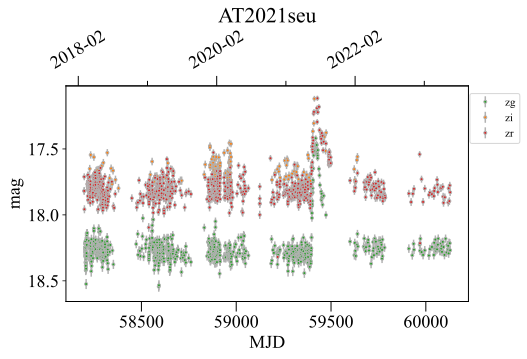

In [20]:
name='AT2021seu'
ztflc_show_in_jupyter(data_g,name,figsize=[7,4])
        

# CLAGN_ztf_variability

#This step is not necessary if you have already installed Lightkurve
#!pip install lightkurve --quiet
#Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install lightkurve --quiet

In [27]:
%matplotlib inline
import lightkurve as lk

In [10]:
AGN_wisedata_dir='/Volumes/ExtremeSSD/data_source/WISE_data'
CLAGN_statistic_plot_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/'
lamostdr10_12_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'

In [11]:
lamostdr6_9_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOST_dr6_9/'
ztf_dir_dr10v1matchSDSSdr16Q='/Volumes/ExtremeSSD/data_source/ZTFdata/dr10v1_match_sdssdr16Q/'

In [12]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOST_dr6_9/

id602806134ra356.29520_dec12.31114.csv* id730307171ra211.30970_dec14.63262.csv*
id603111179ra136.17670_dec45.55473.csv* id767313079ra8.55714_dec3.96330.csv*
id628413223ra136.60770_dec18.67280.csv* id796607108ra165.67160_dec18.05794.csv*
id690003146ra122.60850_dec23.69902.csv* id804003220ra190.71390_dec24.52535.csv*
id723416234ra186.00350_dec22.60383.csv* id843701018ra4.06282_dec11.09890.csv*


In [13]:
CLAGN_list=pd.read_excel('/Users/lyubing/IHEPBox/data/data_clagn/CLAGN-20220609.xlsx')
CLAGN_list=CLAGN_list[CLAGN_list['OX'].notnull()]
CLAGN_list=drop_index(CLAGN_list)


In [14]:
CLAGN_list

Name                     Note             RA  \
0                      1ES 1927+654                      NaN   19h27m19.54s   
1                       1H 0419-577                      NaN  04h26m00.724s   
2    2MASS J01264811-0839481                             NaN  01h26m48.088s   
3           2MASS J07451198+3809114                      NaN  07h45m11.983s   
4           2MASS J09270231+0433080                      NaN  09h27m02.304s   
..                              ...                      ...            ...   
180       ﻿SDSS J133806.59−012412.8                      CLQ            NaN   
181                         Mrk 766                 NGC 4253   12h18m26.51s   
182              SWIFT J2127.4+5654    LQAC 321+056 001        21h27m44.95s   
183                        NGC 6841                 NGC 6841   19h57m49.06s   
184                    LEDA 1154204  6dFGS gJ042838.8-000040            NaN   

               DEC                 Ref.             Type_Ref  Redshift  \
0     +65d33m54.2s     arxiv:1903.11084  2019ApJ...883...94T  0.017000   
1    -57d12m00.97s      arxiv:1201.2169  2012MNRAS.421.1803M  0.104000   
2    -08d39m48.08s     arxiv:1509.03634  2016ApJ...826..188R  0.197910   
3    +38d09m11.30s     arxiv:1810.00087  2019ApJ...874....8M  0.236480   
4    +04d33m08.20s     arxiv:1810.00087  2019ApJ...874....8M  0.321790   
..             ...                  ...                  ...       ...   
180            NaN                  NaN  2023ApJ...953...61Y  0.452000   
181   +29d48m46.3s                  NaN  2011MNRAS.410.1027R  0.012882   
182   +56d56m39.7s                  NaN  2013MNRAS.436.1588S  0.014000   
183   -31d48m38.5s                  NaN  2021ApJ...908L..33G  0.019490   
184            NaN  2023arXiv230908956S                  NaN       NaN   

     lg(MBH/Msun)            Ref..1             mass_Ref  ...  logM  \
0            7.30  arxiv:2011.01954  2021MNRAS.502L..50S  ...   7.3   
1            8.58   arxiv:1401.5614  2014A&A...563A..95D  ...  8.58   
2            8.08  arxiv:1903.02553  2019ApJ...883...76R  ...  8.08   
3            9.10  arxiv:1905.02262  2020MNRAS.491.4925G  ...   9.1   
4             NaN               NaN                  NaN  ...    -    
..            ...               ...                  ...  ...   ...   
180           NaN               NaN                  NaN  ...   NaN   
181           NaN               NaN                  NaN  ...   NaN   
182           NaN               NaN                  NaN  ...   NaN   
183           NaN               NaN                  NaN  ...   NaN   
184           NaN               NaN                  NaN  ...   NaN   

                       pos E(B-V)mean E(B-V)weighted       NHImean  \
0    J 291.83142, 65.56506      0.089          0.088  6.940000e+20   
1    J 66.50302, -57.20027      0.015          0.014  1.290000e+20   
2     J 21.70037, -8.66336      0.034          0.032  3.030000e+20   
3    J 116.29993, 38.15314      0.058          0.055  5.060000e+20   
4     J 141.75960, 4.55228      0.046          0.047  3.150000e+20   
..                     ...        ...            ...           ...   
180                    NaN        NaN            NaN           NaN   
181                    NaN        NaN            NaN           NaN   
182                    NaN        NaN            NaN           NaN   
183                    NaN        NaN            NaN           NaN   
184                    NaN        NaN            NaN           NaN   

      NHIweighted       NH2mean   NH2weighted    NH,totmean  NH,totweighted  
0    6.870000e+20  2.260000e+20  2.230000e+20  9.200000e+20    9.100000e+20  
1    1.260000e+20  5.430000e+18  5.110000e+18  1.340000e+20    1.310000e+20  
2    2.930000e+20  3.440000e+19  3.150000e+19  3.370000e+20    3.250000e+20  
3    4.830000e+20  1.070000e+20  9.540000e+19  6.130000e+20    5.790000e+20  
4    3.130000e+20  4.950000e+19  5.110000e+19  3.650000e+20    3.650000e+20  
..            ...           ...

## def get_intrinsic_var

In [15]:
def get_variablity(data,t_label,f_label,t_label_err=None,f_label_err=None):
    data=drop_index(data)
    
    t= data[t_label]    
    f= data[f_label]
    if f_label_err:
        ferr= data[f_label_err]
    else:
        ferr=0
        
    mu= np.average(f)
    mu_err=np.average(ferr)
    len_flux_rp=len(f)
    
    S_2=  np.sum((mu-f)**2)/(len_flux_rp-1) 
    mean_sigma_err_2=np.average(ferr**2)
    
    if S_2-mean_sigma_err_2>0:
        
        F_var=np.sqrt((S_2-mean_sigma_err_2)/mu**2)
    else:
        F_var=0
        
    return F_var
    

In [16]:
import numpy as np
def get_mag_weighted_mean_mag(mags,e_mags):
    N=len(mags)
    mag_weighted_mean_mag =0  
    
    w_n=np.sum(1.0/e_mags**2)   
    
    for mag,e_mag in zip(mags,e_mags):
        w_i=1.0/e_mag**2
        w=w_i/w_n
        mag_weighted_mean_mag=mag_weighted_mean_mag+w*mag
                          
    return mag_weighted_mean_mag 



def get_mag_weighted_mean_e_mag(mags,e_mags):
    N=len(mags)  

    w_n=np.sum(1.0/e_mags**2)
    
    mag_weighted_mean_mag = get_mag_weighted_mean_mag(mags,e_mags)
    
    mag_weighted_mean_e_mag =0 
    
    for mag,e_mag in zip(mags,e_mags):        
        w_i=1.0/e_mag**2
        w=w_i/w_n
        
        mag_weighted_mean_e_mag=mag_weighted_mean_e_mag+w*(mag-mag_weighted_mean_mag)**2
        
    mag_weighted_mean_e_mag_=(mag_weighted_mean_e_mag/(N-1))**0.5                                 
    return mag_weighted_mean_e_mag_

In [17]:
epsilon_s_w1=0.024
epsilon_s_w2=0.028
epsilon_s_ztf=0.02


def get_intrinsic_var(data,mag_label,magerr_label,epsilon_s):
    data=drop_index(data)
    
    mags=data[mag_label]
    e_mags=data[magerr_label]
    
    mag_weighted_mean_mag = get_mag_weighted_mean_mag(mags,e_mags)    
    mag_weighted_mean_e_mag_= get_mag_weighted_mean_e_mag(mags,e_mags)
    mag_mean=mag_weighted_mean_mag
    
    length_N=len(data[mag_label])
    epsilon_square=np.average(data[magerr_label]**2)+epsilon_s**2
    Sigma_square=np.sum((data[mag_label]-mag_mean)**2)/(length_N-1)
    
    if Sigma_square>epsilon_square:
        sigma_m=np.sqrt(Sigma_square-epsilon_square)
    else:
        sigma_m=0
    
    if length_N<2:
        sigma_m=-1#print(length_N)
    return sigma_m

In [18]:
def get_Delta_mag(data,mag_label):
    
    data=drop_index(data)
    mags=data[mag_label]
    
    if len(data)>2:
        
        return max(mags)-min(mags)

    else:
        return -1

In [19]:
for Name_index,name in enumerate(CLAGN_list['Name']):
    save_name=name.strip().replace(' ','_')
    ztf_file_path='%s/%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name)
    print(ztf_file_path)

NameError: name 'CLAGN_Candidate_BAT_ZTF_dir_2' is not defined

In [26]:
pd.read_csv('/Volumes/ExtremeSSD/data_source/ZTFdata/CLAGNztf/20230703//1ES_1927+654.csv')

oid      expid           hjd           mjd        mag  \
0      827113200013781   44940173  2.458204e+06  58203.401736  15.237422   
1      827113200013781   45041113  2.458205e+06  58204.411134  15.238753   
2      827113200013781   45043163  2.458205e+06  58204.431632  15.231259   
3      827113200013781   45051814  2.458205e+06  58204.518148  15.254226   
4      827113200013781   45143303  2.458206e+06  58205.433032  15.290124   
...                ...        ...           ...           ...        ...   
5162  1858207100000793  139521734  2.459150e+06  59149.217350  16.518133   
5163  1858207100000793  139625831  2.459151e+06  59150.258310  16.587940   
5164  1858207100000793  139625877  2.459151e+06  59150.258773  16.597973   
5165  1858207100000793  139708111  2.459152e+06  59151.081111  16.601444   
5166  1858207100000793  139708157  2.459152e+06  59151.081574  16.672810   

        magerr  catflags filtercode          ra        dec  ...  ccdid  qid  \
0     0.013203         0         zg  291.831232  65.565132  ...    0xd  0x2   
1     0.013204         0         zg  291.831031  65.565207  ...    0xd  0x2   
2     0.013200         0         zg  291.831143  65.565185  ...    0xd  0x2   
3     0.013213         0         zg  291.831350  65.565143  ...    0xd  0x2   
4     0.013233         0         zg  291.831329  65.565112  ...    0xd  0x2   
...        ...       ...        ...         ...        ...  ...    ...  ...   
5162  0.012123         0         zr  291.831477  65.565112  ...    0x7  0x1   
5163  0.012467         0         zr  291.831485  65.565138  ...    0x7  0x1   
5164  0.012518         0         zr  291.831409  65.565097  ...    0x7  0x1   
5165  0.012536         0         zr  291.831428  65.565133  ...    0x7  0x1   
5166  0.012921         0         zr  291.831375  65.565110  ...    0x7  0x1   

       limitmag      magzp  magzprms  clrcoeff  clrcounc  exptime  airmass  \
0     19.980000  26.123301  0.036361 -0.084108  0.000024       30    1.701   
1     18.889999  26.168491  0.042523 -0.093354  0.000098       30    1.623   
2     19.260000  26.173744  0.040639 -0.081998  0.000054       30    1.510   
3     20.530001  26.241196  0.036648 -0.104417  0.000015       30    1.223   
4     19.209999  25.877020  0.039349 -0.076913  0.000050       30    1.490   
...         ...        ...       ...       ...       ...      ...      ...   
5162  19.350000  26.265118  0.038577  0.089424  0.000015       30    1.528   
5163  19.860001  26.325359  0.034974  0.093703  0.000012       30    1.765   
5164  19.940001  26.325407  0.028665  0.094467  0.000008       30    1.768   
5165  20.530001  26.352480  0.021931  0.092850  0.000005       30    1.206   
5166  20.540001  26.365978  0.020626  0.092496  0.000004       30    1.207   

      programid  
0             2  
1             2  
2             2  
3             2  
4             2  
...         ...  
5162          3  
5163          2  
5164          3  
5165          2  
5166          3  

[5167 rows x 24 columns]

In [150]:
for Name_index,name in enumerate(CLAGN_list['Name']):
    save_name=name.strip().replace(' ','_')
    ztf_file_path='%s/%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name)
    
    if not os.path.exists(ztf_file_path):
        CLAGN_list.loc[Name_index,'ztf_flag']=-1
        
        
        
    else:
        CLAGN_list.loc[Name_index,'ztf_flag']=1
        
        pd_ztf_i=pd.read_csv(ztf_file_path)        
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']
        
        if len(pd_ztf_i_zg)>5:
        
            lc_zg = lk.LightCurve(time=pd_ztf_i_zg['mjd'], flux=pd_ztf_i_zg['mag'],flux_err=pd_ztf_i_zg['magerr'])
            lc_clean_zg = lc_zg.remove_outliers(sigma=3)
            #lc_clean_new=lc_clean.to_pandas()#.colnames
            lc_clean_new_zg=pd.DataFrame([])
            lc_clean_new_zg['mjd']=lc_clean_zg['time'].value
            lc_clean_new_zg['mag']=lc_clean_zg['flux'].value
            lc_clean_new_zg['magerr']=lc_clean_zg['flux_err'].value
            lc_clean_new_zg['filtercode']='zg' 

            DeltaM_zg=get_Delta_mag(lc_clean_new_zg,'mag')
            var_zg= get_intrinsic_var(lc_clean_new_zg,'mag','magerr',epsilon_s_ztf)
        else:
            DeltaM_zg=-1
            var_zg=-1
            
            
        if len(pd_ztf_i_zr)>5:        
               
            lc_zr = lk.LightCurve(time=pd_ztf_i_zr['mjd'], flux=pd_ztf_i_zr['mag'],flux_err=pd_ztf_i_zr['magerr'])
            lc_clean_zr = lc_zr.remove_outliers(sigma=3)
            #lc_clean_new=lc_clean.to_pandas()#.colnames
            lc_clean_new_zr=pd.DataFrame([])
            lc_clean_new_zr['mjd']=lc_clean_zr['time'].value
            lc_clean_new_zr['mag']=lc_clean_zr['flux'].value
            lc_clean_new_zr['magerr']=lc_clean_zr['flux_err'].value
            lc_clean_new_zr['filtercode']='zr'

            DeltaM_zr=get_Delta_mag(lc_clean_new_zr,'mag')
            var_zr= get_intrinsic_var(lc_clean_new_zr,'mag','magerr',epsilon_s_ztf)
        
        
        else:
            DeltaM_zr=-1
            var_zr=-1
            
        #DeltaM_zg=get_Delta_mag(pd_ztf_i_zg,'mag')
        #var_zg= get_intrinsic_var(pd_ztf_i_zg,'mag','magerr',epsilon_s_ztf)
        
        #DeltaM_zr=get_Delta_mag(pd_ztf_i_zr,'mag')
        #var_zr= get_intrinsic_var(pd_ztf_i_zr,'mag','magerr',epsilon_s_ztf)
        
        
        CLAGN_list.loc[Name_index,'DeltaM_zg']=DeltaM_zg
        CLAGN_list.loc[Name_index,'var_zg']=var_zg
        
        CLAGN_list.loc[Name_index,'DeltaM_zr']=DeltaM_zr
        CLAGN_list.loc[Name_index,'var_zr']=var_zr        
        
        
        
        

In [151]:
CLAGN_list_ztf=CLAGN_list[CLAGN_list['ztf_flag']==1]
CLAGN_list_ztf=drop_index(CLAGN_list_ztf)

In [152]:
CLAGN_list_ztf_zg=CLAGN_list_ztf[CLAGN_list_ztf['DeltaM_zg']>0]
CLAGN_list_ztf_zg=drop_index(CLAGN_list_ztf_zg)

CLAGN_list_ztf_zr=CLAGN_list_ztf[CLAGN_list_ztf['DeltaM_zr']>0]
CLAGN_list_ztf_zr=drop_index(CLAGN_list_ztf_zr)

In [153]:
CLAGN_list_ztf_zg.columns

Index(['Name', 'Note', 'RA', 'DEC', 'Ref.', 'Type_Ref', 'Redshift',
       'lg(MBH/Msun)', 'Ref..1', 'mass_Ref', 'Type_CL', 'Type_X', 'OX', 'logM',
       'pos', 'E(B-V)mean', 'E(B-V)weighted', 'NHImean', 'NHIweighted',
       'NH2mean', 'NH2weighted', 'NH,totmean', 'NH,totweighted', 'ztf_flag',
       'DeltaM_zg', 'var_zg', 'DeltaM_zr', 'var_zr'],
      dtype='object')

In [154]:
CLAGN_list_ztf_zr.columns

Index(['Name', 'Note', 'RA', 'DEC', 'Ref.', 'Type_Ref', 'Redshift',
       'lg(MBH/Msun)', 'Ref..1', 'mass_Ref', 'Type_CL', 'Type_X', 'OX', 'logM',
       'pos', 'E(B-V)mean', 'E(B-V)weighted', 'NHImean', 'NHIweighted',
       'NH2mean', 'NH2weighted', 'NH,totmean', 'NH,totweighted', 'ztf_flag',
       'DeltaM_zg', 'var_zg', 'DeltaM_zr', 'var_zr'],
      dtype='object')

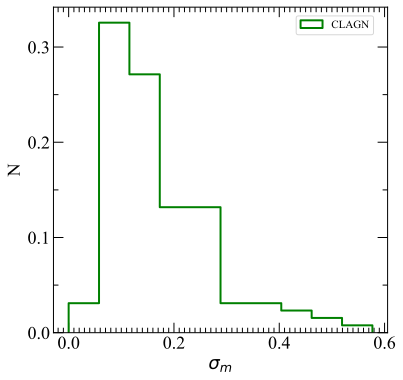

In [50]:
fig = plt.figure(figsize=(6, 6))
ax_histx=fig.add_subplot(1,1,1)

xplot=CLAGN_list_ztf_zg
x=xplot['var_zg']
counts, bins = np.histogram(x,bins=10)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
         #linestyle ='--',
              linewidth=2,
        label='CLAGN',edgecolor='green')



ax_histx.set_ylabel('N')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
ax_histx.set_xlabel(r'$\sigma_m$')

handles, labels = ax_histx.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#
labels_dict=dict(zip(labels, hdl)) #key,values
by_label = OrderedDict(zip(labels, hdl)) 
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
ax_histx.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.71, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

set_ax_tick(ax_histx)
#set_ax_locator(ax_histx,xma=1.0,xmi=0.5,yma=10,ymi=5)
set_ax_locator(ax_histx,xma=0.2,xmi=0.01,yma=0.1,ymi=0.05)
#ax_histx.set_xlim(-6,0.9)
#ax_histx.set_ylim(-0.01,0.65)

#scatter_hist(x, y, ax, ax_histx, ax_histy)
fig.savefig('%s/CLAGN_ztf_sigma_zg.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')


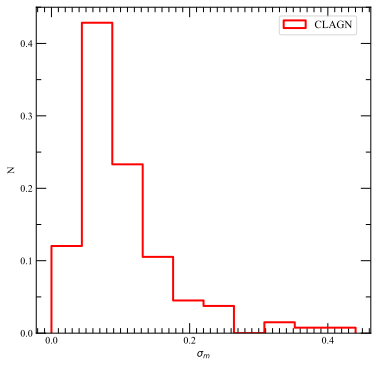

In [155]:
fig = plt.figure(figsize=(6, 6))
ax_histx=fig.add_subplot(1,1,1)

xplot=CLAGN_list_ztf_zr
x=xplot['var_zr']
counts, bins = np.histogram(x,bins=10)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
         #linestyle ='--',
              linewidth=2,
        label='CLAGN',edgecolor='red')





ax_histx.set_ylabel('N')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
ax_histx.set_xlabel(r'$\sigma_m$')

handles, labels = ax_histx.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#
labels_dict=dict(zip(labels, hdl)) #key,values
by_label = OrderedDict(zip(labels, hdl)) 
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
ax_histx.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.71, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

set_ax_tick(ax_histx)
#set_ax_locator(ax_histx,xma=1.0,xmi=0.5,yma=10,ymi=5)
set_ax_locator(ax_histx,xma=0.2,xmi=0.01,yma=0.1,ymi=0.05)
#ax_histx.set_xlim(-6,0.9)
#ax_histx.set_ylim(-0.01,0.65)

#scatter_hist(x, y, ax, ax_histx, ax_histy)
fig.savefig('%s/CLAGN_ztf_sigma_zr.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')


## var_zg_zr

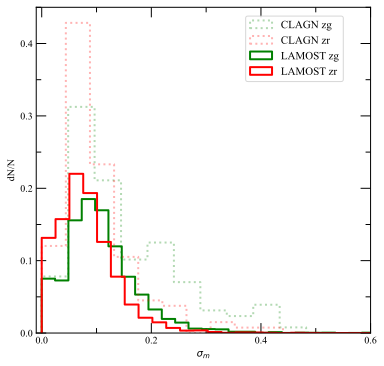

In [224]:
fig = plt.figure(figsize=(6, 6))
ax_histx=fig.add_subplot(1,1,1)

xplot=CLAGN_list_ztf_zg
x=xplot['var_zg']
counts, bins = np.histogram(x,bins=10)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
         linestyle =':',
              linewidth=2,alpha=0.3,
        label='CLAGN zg',edgecolor='green')

xplot=Pd_dr10and11_allQSO_ztf_zg
x=xplot['var_zg']
counts, bins = np.histogram(x,bins=50)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
              #linestyle ='--',
              linewidth=2,
        label='LAMOST zg',edgecolor='green')




xplot=CLAGN_list_ztf_zr
x=xplot['var_zr']
counts, bins = np.histogram(x,bins=10)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
            linestyle =':',
              linewidth=2,alpha=0.3,
        label='CLAGN zr',edgecolor='red')


xplot=Pd_dr10and11_allQSO_ztf_zr
x=xplot['var_zr']
counts, bins = np.histogram(x,bins=50)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
              #linestyle ='--',
              linewidth=2,
        label='LAMOST zr',edgecolor='red')




ax_histx.set_ylabel('dN/N')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
ax_histx.set_xlabel(r'$\sigma_m$')

handles, labels = ax_histx.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#
labels_dict=dict(zip(labels, hdl)) #key,values
by_label = OrderedDict(zip(labels, hdl)) 
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
ax_histx.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.61, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

set_ax_tick(ax_histx)
#set_ax_locator(ax_histx,xma=1.0,xmi=0.5,yma=10,ymi=5)
set_ax_locator(ax_histx,xma=0.2,xmi=0.1,yma=0.1,ymi=0.05)
ax_histx.set_xlim(-0.01,0.6)
#ax_histx.set_ylim(-0.01,0.65)

#scatter_hist(x, y, ax, ax_histx, ax_histy)
fig.savefig('%s/CLAGN_ztf_sigma_zg_zr.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')


In [225]:
CLAGN_list_ztf_zg.columns

Index(['Name', 'Note', 'RA', 'DEC', 'Ref.', 'Type_Ref', 'Redshift',
       'lg(MBH/Msun)', 'Ref..1', 'mass_Ref', 'Type_CL', 'Type_X', 'OX', 'logM',
       'pos', 'E(B-V)mean', 'E(B-V)weighted', 'NHImean', 'NHIweighted',
       'NH2mean', 'NH2weighted', 'NH,totmean', 'NH,totweighted', 'ztf_flag',
       'DeltaM_zg', 'var_zg', 'DeltaM_zr', 'var_zr'],
      dtype='object')

## DeltaM_zg_zr

In [219]:
xplot= Pd_dr10and11_allQSO_ztf_zg
x=xplot['DeltaM_zg']

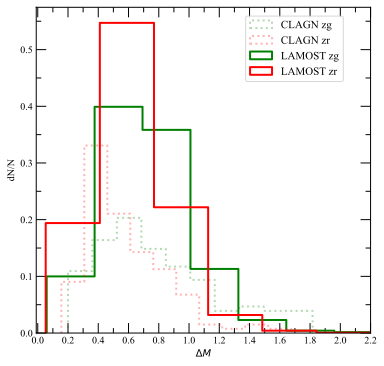

In [223]:
fig = plt.figure(figsize=(6, 6))
ax_histx=fig.add_subplot(1,1,1)

xplot=CLAGN_list_ztf_zg
x=xplot['DeltaM_zg']


counts, bins = np.histogram(x,bins=10)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
            linestyle =':',
              linewidth=2,alpha=0.3,
        label='CLAGN zg',edgecolor='green')

xplot= Pd_dr10and11_allQSO_ztf_zg
x=xplot['DeltaM_zg']
counts, bins = np.histogram(x,bins=10)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
              #linestyle ='--',
              linewidth=2,
        label='LAMOST zg',edgecolor='green')





xplot=CLAGN_list_ztf_zr
x=xplot['DeltaM_zr']
counts, bins = np.histogram(x,bins=10)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
              linestyle =':',
              linewidth=2,alpha=0.3,
        label='CLAGN zr',edgecolor='red')

xplot= Pd_dr10and11_allQSO_ztf_zr
x=xplot['DeltaM_zr']
counts, bins = np.histogram(x,bins=10)
ax_histx.hist(bins[:-1], bins, weights=counts/len(x),fill=False,
              #density=True,
              histtype='step',
              #linestyle ='--',
              linewidth=2,
              
        label='LAMOST zr',edgecolor='red')




ax_histx.set_ylabel('dN/N')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
ax_histx.set_xlabel(r'$\Delta M$')

handles, labels = ax_histx.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#
labels_dict=dict(zip(labels, hdl)) #key,values
by_label = OrderedDict(zip(labels, hdl)) 
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
ax_histx.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.61, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

set_ax_tick(ax_histx)
#set_ax_locator(ax_histx,xma=1.0,xmi=0.5,yma=10,ymi=5)
set_ax_locator(ax_histx,xma=0.2,xmi=0.1,yma=0.1,ymi=0.05)
#ax_histx.set_xlim(-6,0.9)
#ax_histx.set_ylim(-0.01,0.65)
ax_histx.set_xlim(-0.01,2.2)

#scatter_hist(x, y, ax, ax_histx, ax_histy)
fig.savefig('%s/CLAGN_ztf_DeltaM_zg_zr.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')


In [161]:
CLAGN_list_ztf_zr[CLAGN_list_ztf_zr['DeltaM_zr']>1.7]

Empty DataFrame
Columns: [Name, Note, RA, DEC, Ref., Type_Ref, Redshift, lg(MBH/Msun), Ref..1, mass_Ref, Type_CL, Type_X, OX, logM, pos, E(B-V)mean, E(B-V)weighted, NHImean, NHIweighted, NH2mean, NH2weighted, NH,totmean, NH,totweighted, ztf_flag, DeltaM_zg, var_zg, DeltaM_zr, var_zr]
Index: []

[0 rows x 28 columns]

In [162]:
CLAGN_list_ztf_zg[CLAGN_list_ztf_zg['DeltaM_zg']>1.7]

Name Note             RA            DEC  \
4    2MASS J10520355+1519294         NaN  10h52m03.552s  +15d19m29.60s   
5           2MASS J11132967+5313393  NaN  11h13m29.687s  +53d13m38.77s   
96        WISEA J013458.36-091435.4  NaN  01h34m58.361s  -09d14m35.42s   
105       WISEA J110423.23+634305.2  NaN  11h04m23.218s  +63d43m05.36s   

                 Ref.             Type_Ref  Redshift  lg(MBH/Msun)  \
4    arxiv:1805.06920  2018ApJ...864...27S   0.30250           7.9   
5    arxiv:1810.00087  2019ApJ...874....8M   0.23922           7.8   
96   arxiv:1810.00087  2019ApJ...874....8M   0.44313           8.2   
105  arxiv:1711.08122  2018ApJ...862..109Y   0.16427           6.8   

               Ref..1             mass_Ref  ...   NHIweighted       NH2mean  \
4    arxiv:1905.02262  2020MNRAS.491.4925G  ...  2.300000e+20  1.880000e+19   
5    arxiv:1905.02262  2020MNRAS.491.4925G  ...  9.240000e+19  2.980000e+18   
96   arxiv:1905.02262  2020MNRAS.491.4925G  ...  3.410000e+20  3.290000e+19   
105  arxiv:1905.02262  2020MNRAS.491.4925G  ...  1.070000e+20  4.900000e+18   

      NH2weighted    NH,totmean NH,totweighted  ztf_flag  DeltaM_zg    var_zg  \
4    1.910000e+19  2.450000e+20   2.490000e+20       1.0   1.700649  0.368802   
5    2.970000e+18  9.640000e+19   9.540000e+19       1.0   1.816814  0.412676   
96   3.320000e+19  3.600000e+20   3.740000e+20       1.0   1.799005  0.406225   
105  4.130000e+18  1.200000e+20   1.110000e+20       1.0   1.710754  0.482409   

     DeltaM_zr    var_zr  
4     1.215731  0.231330  
5     0.881983  0.196625  
96    1.024590  0.212782  
105   0.999294  0.239510  

[4 rows x 28 columns]

for i in CLAGN_list_ztf_zg['OX']:
    print(i)#[0]

In [244]:
CLAGN_list_ztf_zg_OCLAGN=CLAGN_list_ztf_zg[CLAGN_list_ztf_zg['OX']==' A ']
CLAGN_list_ztf_zg_OCLAGN=drop_index(CLAGN_list_ztf_zg_OCLAGN)

In [245]:
CLAGN_list_ztf_zg_OCLAGN

Name Note             RA            DEC  \
0                      1ES 1927+654  NaN   19h27m19.54s   +65d33m54.2s   
1    2MASS J01264811-0839481         NaN  01h26m48.088s  -08d39m48.08s   
2           2MASS J07451198+3809114  NaN  07h45m11.983s  +38d09m11.30s   
3    2MASS J10022021+4509276         NaN  10h02m20.181s  +45d09m27.36s   
4    2MASS J10520355+1519294         NaN  10h52m03.552s  +15d19m29.60s   
..                              ...  ...            ...            ...   
113                        NGC 3786  NaN   11h39m42.55s   +31d54m33.4s   
114         SDSSJ162829.17+432948.5  NaN   16h28m29.18s   +43d29m48.5s   
115                    B3 0749+460A  NaN   07h52m44.20s   +45d56m57.4s   
116                        NGC 5273  NaN   13h42m08.34s   +35d39m15.2s   
117                        NGC 4156  NaN   12h10m49.61s   +39d28m21.8s   

                    Ref.             Type_Ref  Redshift  lg(MBH/Msun)  \
0       arxiv:1903.11084  2019ApJ...883...94T  0.017000          7.30   
1       arxiv:1509.03634  2016ApJ...826..188R  0.197910          8.08   
2       arxiv:1810.00087  2019ApJ...874....8M  0.236480          9.10   
3       arxiv:1509.08393  2021A&A...650A..33P  0.400900          8.70   
4       arxiv:1805.06920  2018ApJ...864...27S  0.302500          7.90   
..                   ...                  ...       ...           ...   
113     arxiv:2208.08062                  NaN  0.009083           NaN   
114     arxiv:2210.07258                  NaN  0.260285           NaN   
115  2022RAA....22a5011W  2022RAA....22a5011W  0.051738           NaN   
116     arxiv:2211.03801                  NaN  0.003611           NaN   
117  2022A&A...667L..12T  2022A&A...667L..12T  0.022617           NaN   

               Ref..1             mass_Ref  ...   NHIweighted       NH2mean  \
0    arxiv:2011.01954  2021MNRAS.502L..50S  ...  6.870000e+20  2.260000e+20   
1    arxiv:1903.02553  2019ApJ...883...76R  ...  2.930000e+20  3.440000e+19   
2    arxiv:1905.02262  2020MNRAS.491.4925G  ...  4.830000e+20  1.070000e+20   
3    arxiv:1903.02553  2019ApJ...883...76R  ...  9.970000e+19  2.790000e+18   
4    arxiv:1905.02262  2020MNRAS.491.4925G  ...  2.300000e+20  1.880000e+19   
..                ...                  ...  ...           ...           ...   
113               NaN                  NaN  ...           NaN           NaN   
114               NaN                  NaN  ...           NaN           NaN   
115               NaN                  NaN  ...           NaN           NaN   
116               NaN                  NaN  ...           NaN           NaN   
117               NaN                  NaN  ...           NaN           NaN   

      NH2weighted    NH,totmean NH,totweighted  ztf_flag  DeltaM_zg    var_zg  \
0    2.230000e+20  9.200000e+20   9.100000e+20       1.0   1.603352  0.417392   
1    3.150000e+19  3.370000e+20   3.250000e+20       1.0   0.558294  0.062715   
2    9.540000e+19  6.130000e+20   5.790000e+20       1.0   1.181681  0.241243   
3    2.990000e+18  9.820000e+19   1.030000e+20       1.0   1.241642  0.246892   
4    1.910000e+19  2.450000e+20   2.490000e+20       1.0   1.700649  0.368802   
..            ...           ...            ...       ...        ...       ...   
113           NaN           NaN            NaN       1.0   0.273362  0.046663   
114           NaN           NaN            NaN       1.0   0.961634  0.141362   
115           NaN           NaN            NaN       1.0   0.359753  0.057785   
116           NaN           NaN            NaN       1.0   0.449958  0.086458   
117           NaN           NaN            NaN       1.0   0.356464  0.059491   

     DeltaM_zr    var_zr  
0     1.476694  0.366367  
1     0.373585  0.033156  
2     0.621216  0.099675  
3     0.710056  0.098048  
4     1.215731  0.231330  
..         ...       ...  
113   0.391015  0.069472  
114   0.557392  0.077865  
115   0.313340  0.051506  
116   0.481608  0.078001  
117   0.342290  0.057814  

[118 rows x 28 col

In [247]:
CLAGN_list_ztf_zg_XCLAGN=CLAGN_list_ztf_zg[CLAGN_list_ztf_zg['OX']==' B ']
CLAGN_list_ztf_zg_XCLAGN=drop_index(CLAGN_list_ztf_zg_XCLAGN)

In [248]:
CLAGN_list_ztf_zg_XCLAGN

Name Note             RA            DEC              Ref.  \
0    IC 751  NaN  11h58m52.596s  +42d34m13.21s  arxiv:1602.00702   
1  NGC 4051  NaN  12h03m09.614s  +44d31m52.80s   arxiv:1201.2169   
2  NGC 4388  NaN  12h25m46.747s  +12d39m43.51s   arxiv:1201.2169   
3  NGC 4395  NaN  12h25m48.862s  +33d32m48.94s  arxiv:2107.11127   
4  NGC 4939  NaN   13h04m14.39s   -10d20m22.6s     arxiv:0409689   
5  NGC 7674  NaN  23h27m56.724s  +08d46m44.53s     arxiv:0507323   
6  UGC 4203  NaN  08h04m05.858s  +05d06m49.84s     arxiv:0302328   
7  NGC 1358  NaN   03h33m39.67s   -05d05m21.8s  arxiv:2207.06734   

              Type_Ref  Redshift  lg(MBH/Msun)               Ref..1  \
0  2016ApJ...820....5R  0.031500          8.50     arxiv:1602.00702   
1  2012MNRAS.421.1803M  0.002340          6.36     arxiv:1905.03683   
2  2012MNRAS.421.1803M  0.008420          6.92     arxiv:1908.08023   
3  2021MNRAS.507..687J  0.001060          5.56  2005ApJ...632..799P   
4  2005MNRAS.356..295G  0.010380          7.52  2017ApJ...850...74K   
5  2005A&A...442..185B  0.029030          7.56     arxiv:1709.06258   
6  2003MNRAS.342..422M  0.013500          6.78  2017MNRAS.468L..97O   
7                  NaN  0.013436           NaN                  NaN   

              mass_Ref  ...   NHIweighted       NH2mean   NH2weighted  \
0  2016ApJ...820....5R  ...  1.220000e+20  5.650000e+18  5.840000e+18   
1  2019MNRAS.487..667C  ...  1.150000e+20  4.330000e+18  4.380000e+18   
2  2019ApJ...884..106M  ...  2.580000e+20  2.810000e+19  2.880000e+19   
3  2005ApJ...632..799P  ...  1.850000e+20  7.940000e+18  8.660000e+18   
4  2017ApJ...850...74K  ...  3.300000e+20  5.240000e+19  5.240000e+19   
5  2017NatAs...1..727K  ...  4.270000e+20  8.770000e+19  9.270000e+19   
6  2017MNRAS.468L..97O  ...  3.450000e+20  2.990000e+19  3.040000e+19   
7                  NaN  ...           NaN           NaN           NaN   

     NH,totmean NH,totweighted  ztf_flag  DeltaM_zg    var_zg  DeltaM_zr  \
0  1.270000e+20   1.280000e+20       1.0   0.357819  0.056400   0.332093   
1  1.190000e+20   1.200000e+20       1.0   0.412328  0.066336   0.385446   
2  2.890000e+20   2.870000e+20       1.0   0.423840  0.070505   0.413222   
3  1.810000e+20   1.930000e+20       1.0   0.654385  0.141118   0.767803   
4  3.780000e+20   3.830000e+20       1.0   0.368811  0.068166   0.299630   
5  5.090000e+20   5.200000e+20       1.0   0.205589  0.027501   0.249060   
6  3.720000e+20   3.750000e+20       1.0   0.229024  0.038071   0.249782   
7           NaN            NaN       1.0   0.372704  0.066618   0.321800   

     var_zr  
0  0.049658  
1  0.065316  
2  0.072202  
3  0.162368  
4  0.043885  
5  0.038911  
6  0.036925  
7  0.051642  

[8 rows x 28 columns]

## DeltaM and var

In [256]:
fig = plt.figure(figsize=(6, 6))
ax_histx=fig.add_subplot(1,1,1)

xplot=CLAGN_list_ztf_zg_XCLAGN
x=xplot['var_zg']
y=xplot['DeltaM_zg']
ax_histx.errorbar(x,y,label='CLAGN zg',color='red',alpha=0.3,ls='',marker='d',ms=7,zorder=3)


xplot=CLAGN_list_ztf_zg_OCLAGN
x=xplot['var_zg']
y=xplot['DeltaM_zg']
ax_histx.errorbar(x,y,label='CLAGN zg',color='blue',alpha=0.3,ls='',marker='d',ms=7,zorder=2)



xplot=Pd_dr10and11_allQSO_ztf_zg
x=xplot['var_zg']
y=xplot['DeltaM_zg']
ax_histx.errorbar(x,y,label='LAMOST zg',color='green',alpha=1.0,ls='',marker='p',zorder=1)



'''xplot=CLAGN_list_ztf_zr
x=xplot['var_zr']
y=xplot['DeltaM_zr']

ax_histx.errorbar(x,y,label='CLAGN zr',color='black',alpha=0.3,ls='',marker='+',ms=7,zorder=2)


xplot=Pd_dr10and11_allQSO_ztf_zr
x=xplot['var_zr']
y=xplot['DeltaM_zr']
ax_histx.errorbar(x,y,label='LAMOST zr',color='red',alpha=1.0,ls='',marker='p',zorder=1)
'''


ax_histx.set_ylabel(r'$\Delta M$')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
#ax_histx.set_xlabel(r'$log(L_\mathrm{W1}/L_\mathrm{Edd})$')
ax_histx.set_xlabel(r'$\sigma_m$')

handles, labels = ax_histx.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#
labels_dict=dict(zip(labels, hdl)) #key,values
by_label = OrderedDict(zip(labels, hdl)) 
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
ax_histx.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

set_ax_tick(ax_histx)
#set_ax_locator(ax_histx,xma=1.0,xmi=0.5,yma=10,ymi=5)
set_ax_locator(ax_histx,xma=0.2,xmi=0.1,yma=0.1,ymi=0.05)
ax_histx.set_xlim(-0.01,0.7)
ax_histx.set_ylim(-0.01,3.0)

#scatter_hist(x, y, ax, ax_histx, ax_histy)
fig.savefig('%s/CLAGN_ztf_sigma_DeltaM.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')


## testone

(<Figure size 504x288 with 1 Axes>,
 <Axes: title={'center': '2MASS J10520355+1519294'}, xlabel='MJD', ylabel='mag'>)

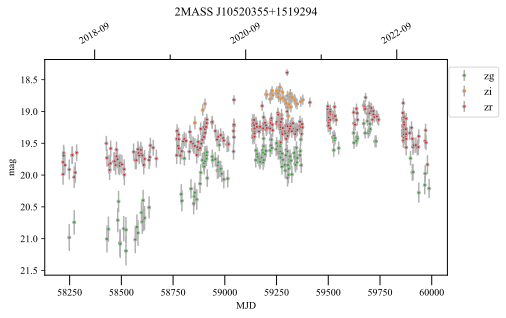

In [165]:
#name='SDSS J122550.30+510846.3'
name='2MASS J10520355+1519294'
save_name=name.strip().replace(' ','_')
ztf_file_path='%s/%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name)
data=pd.read_csv(ztf_file_path) 
ztflc_show_in_jupyter(data,name)

In [166]:
data_zr=data[data['filtercode']=='zr']

In [167]:
lc = lk.LightCurve(time=data_zr['mjd'], flux=data_zr['mag'],flux_err=data_zr['magerr'])
lc_clean = lc.remove_outliers(sigma=3)

#lc_clean_new=lc_clean.to_pandas()#.colnames
lc_clean_new=pd.DataFrame([])
lc_clean_new['mjd']=lc_clean['time'].value
lc_clean_new['mag']=lc_clean['flux'].value
lc_clean_new['magerr']=lc_clean['flux_err'].value
lc_clean_new['filtercode']='zr'

#lc_clean_new['mjd']=np.array(lc_clean['time'],dtype=object)
#lc_clean_new.colums=['mag','magerr','mjd']
#lc_clean_new['mag']=np.array(lc_clean['flux'],dtype=object)
#lc_clean_new['magerr']=np.array(lc_clean['flux_err'],dtype=object)
#lc_clean_new['filtercode']='zr'
#lc_clean_new=drop_index(lc_clean_new)

In [168]:
lc_clean_new

mjd        mag    magerr filtercode
0    58218.214873  19.988008  0.164594         zr
1    58218.242512  19.797527  0.146056         zr
2    58221.204363  19.654863  0.132839         zr
3    58221.227037  19.693205  0.136320         zr
4    58227.242986  19.843556  0.150460         zr
..            ...        ...       ...        ...
297  59937.461852  19.390751  0.110525         zr
298  59968.382535  19.464178  0.116422         zr
299  59970.367465  19.295803  0.103266         zr
300  59972.380937  19.489483  0.118510         zr
301  59979.419757  19.834889  0.149626         zr

[302 rows x 4 columns]

In [169]:
data_zr.columns

Index(['oid', 'expid', 'hjd', 'mjd', 'mag', 'magerr', 'catflags', 'filtercode',
       'ra', 'dec', 'chi', 'sharp', 'filefracday', 'field', 'ccdid', 'qid',
       'limitmag', 'magzp', 'magzprms', 'clrcoeff', 'clrcounc', 'exptime',
       'airmass', 'programid'],
      dtype='object')

In [170]:
ztflc_show_in_jupyter(data_zr,name)

(<Figure size 504x288 with 1 Axes>,
 <Axes: title={'center': '2MASS J10520355+1519294'}, xlabel='MJD', ylabel='mag'>)

(<Figure size 504x288 with 1 Axes>,
 <Axes: title={'center': '2MASS J10520355+1519294'}, xlabel='MJD', ylabel='mag'>)

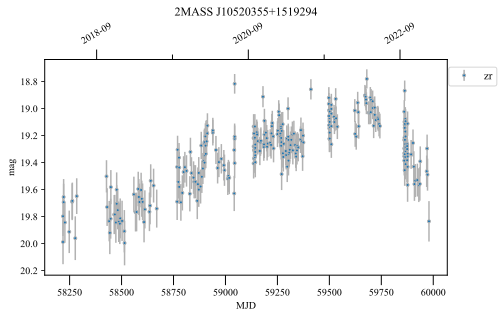

In [171]:
ztflc_plotdata_in_jupyter(lc_clean_new,name,filter_='zr')

In [156]:
CLAGN_statistic_plot_dir

'/Volumes/ExtremeSSD/CLAGN_statistic_plot/'

In [157]:
!open /Volumes/ExtremeSSD/CLAGN_statistic_plot/

(<Figure size 504x288 with 1 Axes>,
 <Axes: title={'center': '2MASS J11132967+5313393'}, xlabel='MJD', ylabel='mag'>)

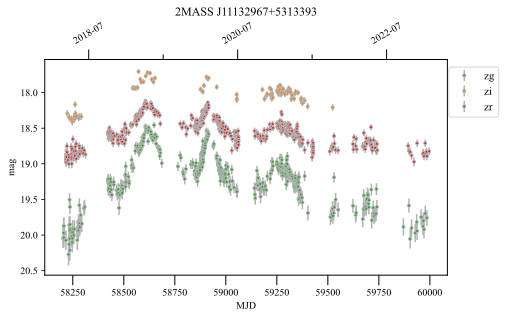

In [172]:
name='2MASS J11132967+5313393'
save_name=name.strip().replace(' ','_')
ztf_file_path='%s/%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name)
data=pd.read_csv(ztf_file_path) 
ztflc_show_in_jupyter(data,name)

In [ ]:
lamostdr6_9_matchSDSS_ztfdata

In [182]:
#name='2MASS J11132967+5313393'
ra=4.062822
dec=11.098900
obsid_i=843701018
save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
#save_name=name.strip().replace(' ','_')
ZTF_download_lamost(obsid_i,ra,dec,path=lamostdr6_9_matchSDSS_ztfdata)

(<Figure size 504x288 with 1 Axes>,
 <Axes: title={'center': '2MASS J11132967+5313393'}, xlabel='MJD', ylabel='mag'>)

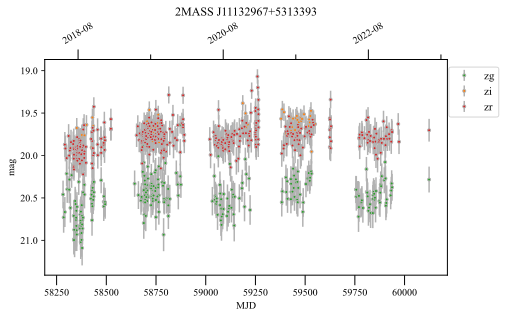

In [183]:
ztf_file_path='%s/%s.csv'%(lamostdr6_9_matchSDSS_ztfdata,save_name)
data=pd.read_csv(ztf_file_path) 
ztflc_show_in_jupyter(data,name)

In [176]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id8437*

zsh:1: no matches found: /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id8437*


## Pd_dr10and11_allQSO

Pd_dr10and11_allQSO=pd.read_csv('/Users/lyubing/Downloads/LAMOST/Dr10anddr11QSO_list.csv')

In [25]:
Pd_dr10and11_allQSO[:5]#.columns

objra     objdec      OBSID         z
0  213.502668  23.598623  995304172  1.771086
1  147.701667  39.447350  965311077  0.205535
2  215.851018  53.586442  995909129  0.758102
3  143.620016  17.675373  948815097  0.415725
4  129.245604  44.433944  978108152  0.254400

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'

for Name_index,obsid_i in enumerate(Pd_dr10and11_allQSO['OBSID']):
    
    ra=Pd_dr10and11_allQSO.loc[Name_index,'objra']
    dec=Pd_dr10and11_allQSO.loc[Name_index,'objdec']
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    #save_name=name.strip().replace(' ','_')
    
    
    ztf_file_path='%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name)
    
    if not os.path.exists(ztf_file_path):
        Pd_dr10and11_allQSO.loc[Name_index,'ztf_flag']=-1
        
                
    else:
        Pd_dr10and11_allQSO.loc[Name_index,'ztf_flag']=1
        
        pd_ztf_i=pd.read_csv(ztf_file_path)
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']
        
        if len(pd_ztf_i_zg)>5:
        
            lc_zg = lk.LightCurve(time=pd_ztf_i_zg['mjd'], flux=pd_ztf_i_zg['mag'],flux_err=pd_ztf_i_zg['magerr'])
            lc_clean_zg = lc_zg.remove_outliers(sigma=3)
            #lc_clean_new=lc_clean.to_pandas()#.colnames
            lc_clean_new_zg=pd.DataFrame([])
            lc_clean_new_zg['mjd']=lc_clean_zg['time'].value
            lc_clean_new_zg['mag']=lc_clean_zg['flux'].value
            lc_clean_new_zg['magerr']=lc_clean_zg['flux_err'].value
            lc_clean_new_zg['filtercode']='zg'

            DeltaM_zg=get_Delta_mag(lc_clean_new_zg,'mag')
            var_zg= get_intrinsic_var(lc_clean_new_zg,'mag','magerr',epsilon_s_ztf)
        else:
            DeltaM_zg=-1
            var_zg=-1
            
            
        if len(pd_ztf_i_zr)>5:
               
            lc_zr = lk.LightCurve(time=pd_ztf_i_zr['mjd'], flux=pd_ztf_i_zr['mag'],flux_err=pd_ztf_i_zr['magerr'])
            lc_clean_zr = lc_zr.remove_outliers(sigma=3)
            #lc_clean_new=lc_clean.to_pandas()#.colnames
            lc_clean_new_zr=pd.DataFrame([])
            lc_clean_new_zr['mjd']=lc_clean_zr['time'].value
            lc_clean_new_zr['mag']=lc_clean_zr['flux'].value
            lc_clean_new_zr['magerr']=lc_clean_zr['flux_err'].value
            lc_clean_new_zr['filtercode']='zr'

            DeltaM_zr=get_Delta_mag(lc_clean_new_zr,'mag')
            var_zr= get_intrinsic_var(lc_clean_new_zr,'mag','magerr',epsilon_s_ztf)
        
        
        else:
            DeltaM_zr=-1
            var_zr=-1
            
        #DeltaM_zg=get_Delta_mag(pd_ztf_i_zg,'mag')
        #var_zg= get_intrinsic_var(pd_ztf_i_zg,'mag','magerr',epsilon_s_ztf)
        
        #DeltaM_zr=get_Delta_mag(pd_ztf_i_zr,'mag')
        #var_zr= get_intrinsic_var(pd_ztf_i_zr,'mag','magerr',epsilon_s_ztf)
        
        
        Pd_dr10and11_allQSO.loc[Name_index,'DeltaM_zg']=DeltaM_zg
        Pd_dr10and11_allQSO.loc[Name_index,'var_zg']=var_zg
        
        Pd_dr10and11_allQSO.loc[Name_index,'DeltaM_zr']=DeltaM_zr
        Pd_dr10and11_allQSO.loc[Name_index,'var_zr']=var_zr
        
        
        
        


Pd_dr10and11_allQSO.to_csv('/Users/lyubing/Downloads/LAMOST/Pd_dr10and11_allQSO.csv',index=False)

## read Pd_dr10and11_allQSO

In [30]:
Pd_dr10and11_allQSO=pd.read_csv('/Users/lyubing/Downloads/LAMOST/Pd_dr10and11_allQSO.csv')

In [31]:
Pd_dr10and11_allQSO_ztf=Pd_dr10and11_allQSO[Pd_dr10and11_allQSO['ztf_flag']==1]
Pd_dr10and11_allQSO_ztf=drop_index(Pd_dr10and11_allQSO_ztf)

Pd_dr10and11_allQSO_ztf_zg=Pd_dr10and11_allQSO_ztf[Pd_dr10and11_allQSO_ztf['DeltaM_zg']>0]
Pd_dr10and11_allQSO_ztf_zg=drop_index(Pd_dr10and11_allQSO_ztf_zg)

Pd_dr10and11_allQSO_ztf_zr=Pd_dr10and11_allQSO_ztf[Pd_dr10and11_allQSO_ztf['DeltaM_zr']>0]
Pd_dr10and11_allQSO_ztf_zr=drop_index(Pd_dr10and11_allQSO_ztf_zr)


In [35]:
Pd_dr10and11_allQSO_CLC1=Pd_dr10and11_allQSO_ztf_zr[Pd_dr10and11_allQSO_ztf_zr['var_zr']>0.2]
Pd_dr10and11_allQSO_CLC1=Pd_dr10and11_allQSO_CLC1[Pd_dr10and11_allQSO_CLC1['DeltaM_zr']>1.5]
Pd_dr10and11_allQSO_CLC1=drop_index(Pd_dr10and11_allQSO_CLC1)
Pd_dr10and11_allQSO_CLC1

objra     objdec       OBSID         z  ztf_flag  DeltaM_zg  \
0   226.104090  10.494216   991604115  1.837857       1.0   3.226732   
1   175.982140   8.725093   965413242  0.674571       1.0   1.634975   
2   226.104090  10.494216  1003204115  1.837857       1.0   3.226732   
3   143.545730  18.111651   948816114  0.635834       1.0   1.460432   
4   193.127350  15.282501  1009612040  1.723957       1.0   1.655672   
5    10.366451  22.898572   950306195  0.757839       1.0   1.720726   
6   176.053088   8.029927   963608096  0.488775       1.0   1.967505   
7   176.053088   8.029927   965408096  0.489429       1.0   1.967505   
8   198.364003  -3.277155   974704126  0.568867       1.0   2.188866   
9   198.364003  -3.277155   975504126  0.568615       1.0   2.188866   
10  186.541719  14.390414   991503186  1.001731       1.0   1.698370   
11  188.199120   8.202232   995201041  0.594445       1.0   1.552782   
12  186.234557  10.738028   995214226  1.211278       1.0   1.860802   
13  189.238494   6.018750   995811090  0.713859       1.0   1.475929   
14  184.228099  15.602235   998308188  0.848271       1.0   1.181196   
15  214.291987  25.574856   998411056  0.849512       1.0   1.506619   
16  190.415744  14.193354  1009614158  0.643692       1.0   1.614538   
17    1.030685  22.104375  1046315035  0.934236       1.0   2.011105   
18   19.271612  15.492160  1068808008  1.838122       1.0   1.460972   
19  143.035878  25.660619  1072410099  0.745025       1.0   1.199121   
20  161.172141  13.005940  1074010185  1.565784       1.0   1.989042   
21  169.737923  -1.593728  1087612060  0.849625       1.0   1.358534   
22  154.737050   1.482396  1089304055  0.404772       1.0   2.180889   
23  154.737050   1.482396  1090004055  0.404004       1.0   2.180889   
24  292.313970  42.676604  1127101198  0.695502       1.0   1.224327   

      var_zg  DeltaM_zr    var_zr  
0   1.217275   3.631859  1.262086  
1   0.363745   1.689566  0.418267  
2   1.217275   3.631859  1.262086  
3   0.321909   1.643101  0.393850  
4   0.261131   1.590939  0.209351  
5   0.371677   1.562309  0.337007  
6   0.329135   1.668417  0.262706  
7   0.329135   1.668417  0.262706  
8   0.511445   1.953365  0.465250  
9   0.511445   1.953365  0.465250  
10  0.291552   1.663269  0.289683  
11  0.248452   1.564507  0.237581  
12  0.500717   1.973810  0.486037  
13  0.359701   1.642057  0.360240  
14  0.189243   1.579353  0.246906  
15  0.294285   1.526840  0.283062  
16  0.247695   1.617477  0.225704  
17  0.376082   1.514931  0.327411  
18  0.355200   1.597130  0.293135  
19  0.214844   1.546719  0.297753  
20  0.465570   1.594332  0.309024  
21  0.329683   1.519857  0.358485  
22  0.594905   1.575827  0.367975  
23  0.594905   1.575827  0.367975  
24  0.232603   1.517851  0.285343

In [41]:
for i in Pd_dr10and11_allQSO_CLC1['OBSID']:
    if len(Pd_dr10and11_allQSO_CLC[Pd_dr10and11_allQSO_CLC['OBSID']==i])>0:
        #print(i,"done")
        print()
    else:
        print(i)





948816114









995811090
998308188



1068808008
1072410099

1087612060


1127101198


## Pd_dr10and11_allQSO_CLC

In [32]:
Pd_dr10and11_allQSO_CLC=Pd_dr10and11_allQSO_ztf_zg[Pd_dr10and11_allQSO_ztf_zg['var_zg']>0.2]
Pd_dr10and11_allQSO_CLC=Pd_dr10and11_allQSO_CLC[Pd_dr10and11_allQSO_CLC['DeltaM_zg']>1.5]
Pd_dr10and11_allQSO_CLC=drop_index(Pd_dr10and11_allQSO_CLC)

Pd_dr10and11_allQSO_CLC

objra     objdec       OBSID         z  ztf_flag  DeltaM_zg  \
0   147.631550  38.435607   965304033  0.416185       1.0   1.831823   
1   239.921161  50.158057  1001804090  1.793064       1.0   1.731239   
2   147.631550  38.435607   975404033  0.416185       1.0   1.831823   
3   225.808530  23.318269  1017315062  0.182700       1.0   1.663614   
4   226.104090  10.494216   991604115  1.837857       1.0   3.226732   
..         ...        ...         ...       ...       ...        ...   
69  154.737050   1.482396  1089304055  0.404772       1.0   2.180889   
70  154.357887   2.470967  1089315105  0.357304       1.0   1.517883   
71  154.737050   1.482396  1090004055  0.404004       1.0   2.180889   
72  229.860129   4.417770  1113806250  1.575031       1.0   1.870239   
73  242.200910   0.696790  1123805231  0.424616       1.0   1.591335   

      var_zg  DeltaM_zr    var_zr  
0   0.337387   1.177856  0.215662  
1   0.313940   1.367451  0.214591  
2   0.337387   1.177856  0.215662  
3   0.413109   0.956020  0.189666  
4   1.217275   3.631859  1.262086  
..       ...        ...       ...  
69  0.594905   1.575827  0.367975  
70  0.339173   1.292206  0.294064  
71  0.594905   1.575827  0.367975  
72  0.352764   1.459524  0.262866  
73  0.360080   1.179834  0.210785  

[74 rows x 9 columns]

In [33]:
Pd_dr10and11_allQSO_CLC.to_csv('/Users/lyubing/Downloads/LAMOST/Pd_dr10and11_allQSO_CLC.csv',index=False)

In [42]:
Pd_dr10and11_allQSO_CLC1.to_csv('/Users/lyubing/Downloads/LAMOST/Pd_dr10and11_allQSO_CLC1.csv',index=False)

Pd_dr10and11_allQSO

## testonelamost

(<Figure size 504x288 with 1 Axes>,
 <Axes: title={'center': '2MASS J11132967+5313393'}, xlabel='MJD', ylabel='mag'>)

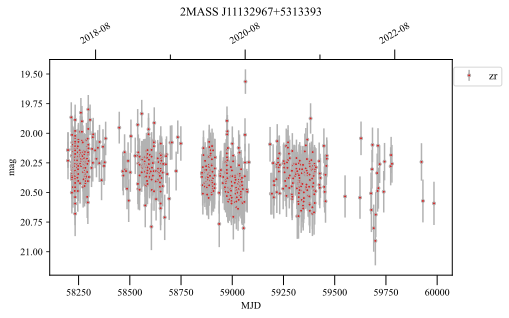

In [194]:
#name='SDSS J122550.30+510846.3'
#name='2MASS J10520355+1519294'
#save_name=name.strip().replace(' ','_')
ra=215.851018
dec=53.586442
obsid_i=995909129
save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
ztf_file_path='%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name)
data=pd.read_csv(ztf_file_path) 

ztflc_show_in_jupyter(data[data['filtercode']=='zr'],name)



(<Figure size 504x288 with 1 Axes>,
 <Axes: title={'center': '2MASS J11132967+5313393'}, xlabel='MJD', ylabel='mag'>)

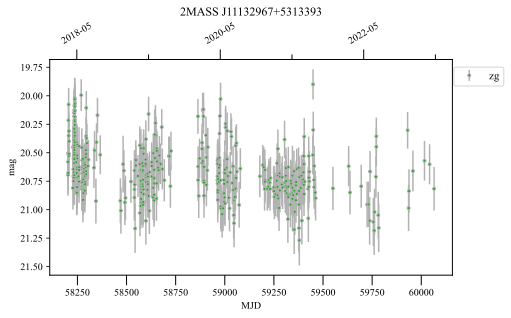

In [195]:
#name='SDSS J122550.30+510846.3'
#name='2MASS J10520355+1519294'
#save_name=name.strip().replace(' ','_')
ra=215.851018
dec=53.586442
obsid_i=995909129
save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
ztf_file_path='%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name)
data=pd.read_csv(ztf_file_path) 

ztflc_show_in_jupyter(data[data['filtercode']=='zg'],name)

In [262]:
Pd_dr10and11_allQSO_CLC

objra     objdec       OBSID         z  ztf_flag  DeltaM_zg    var_zg  \
0  226.104090  10.494216   991604115  1.837857       1.0   3.226732  1.217275   
1  226.104090  10.494216  1003204115  1.837857       1.0   3.226732  1.217275   
2  241.569597  51.415488  1001809188  0.286133       1.0   2.546459  0.527520   
3  198.364003  -3.277155   974704126  0.568867       1.0   2.188866  0.511445   
4  198.364003  -3.277155   975504126  0.568615       1.0   2.188866  0.511445   
5    1.030685  22.104375  1046315035  0.934236       1.0   2.011105  0.376082   
6   28.835771  18.557027  1046407148  0.314537       1.0   2.220591  0.569671   
7  154.737050   1.482396  1089304055  0.404772       1.0   2.180889  0.594905   
8  154.737050   1.482396  1090004055  0.404004       1.0   2.180889  0.594905   

   DeltaM_zr    var_zr  
0   3.631859  1.262086  
1   3.631859  1.262086  
2   0.954306  0.181069  
3   1.953365  0.465250  
4   1.953365  0.465250  
5   1.514931  0.327411  
6   0.907221  0.186432  
7   1.575827  0.367975  
8   1.575827  0.367975

## ztflc_dir_CLL

In [263]:
ztflc_dir_CLL='/Users/lyubing/Downloads/LAMOST/CLAGN_candidates/ZTF_lc_CLC/'

In [268]:
#name='SDSS J122550.30+510846.3'
#name='2MASS J10520355+1519294'
#save_name=name.strip().replace(' ','_')
for index,obsid_i in enumerate(Pd_dr10and11_allQSO_CLC['OBSID']):
    #ra=215.851018
    #dec=53.586442
    #obsid_i=995909129
    ra=Pd_dr10and11_allQSO_CLC.loc[index,'objra']
    dec=Pd_dr10and11_allQSO_CLC.loc[index,'objdec']
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)

    ztf_file_path='%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name)
    data=pd.read_csv(ztf_file_path) 
    save_img_path='%s/%s.png'%(ztflc_dir_CLL,save_name)
    
    if not os.path.exists(save_img_path):
        
        fig,ax= ztflc_show_in_jupyter(data,save_name)       

        fig.savefig(save_img_path, dpi=400, transparent=False, bbox_inches='tight')
        plt.close()

In [269]:
Pd_dr10and11_allQSO_CLC

objra     objdec       OBSID         z  ztf_flag  DeltaM_zg  \
0   147.631550  38.435607   965304033  0.416185       1.0   1.831823   
1   239.921161  50.158057  1001804090  1.793064       1.0   1.731239   
2   147.631550  38.435607   975404033  0.416185       1.0   1.831823   
3   225.808530  23.318269  1017315062  0.182700       1.0   1.663614   
4   226.104090  10.494216   991604115  1.837857       1.0   3.226732   
..         ...        ...         ...       ...       ...        ...   
69  154.737050   1.482396  1089304055  0.404772       1.0   2.180889   
70  154.357887   2.470967  1089315105  0.357304       1.0   1.517883   
71  154.737050   1.482396  1090004055  0.404004       1.0   2.180889   
72  229.860129   4.417770  1113806250  1.575031       1.0   1.870239   
73  242.200910   0.696790  1123805231  0.424616       1.0   1.591335   

      var_zg  DeltaM_zr    var_zr  
0   0.337387   1.177856  0.215662  
1   0.313940   1.367451  0.214591  
2   0.337387   1.177856  0.215662  
3   0.413109   0.956020  0.189666  
4   1.217275   3.631859  1.262086  
..       ...        ...       ...  
69  0.594905   1.575827  0.367975  
70  0.339173   1.292206  0.294064  
71  0.594905   1.575827  0.367975  
72  0.352764   1.459524  0.262866  
73  0.360080   1.179834  0.210785  

[74 rows x 9 columns]

In [271]:
CLAGN_list.columns

Index(['Name', 'Note', 'RA', 'DEC', 'Ref.', 'Type_Ref', 'Redshift',
       'lg(MBH/Msun)', 'Ref..1', 'mass_Ref', 'Type_CL', 'Type_X', 'OX', 'logM',
       'pos', 'E(B-V)mean', 'E(B-V)weighted', 'NHImean', 'NHIweighted',
       'NH2mean', 'NH2weighted', 'NH,totmean', 'NH,totweighted', 'ztf_flag',
       'DeltaM_zg', 'var_zg', 'DeltaM_zr', 'var_zr'],
      dtype='object')

## WISE_LC_download

In [44]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120
#radius=2*u.arcsec default 10*u.arcsec

def download_wise_withradec(radeg,decdeg,wisedata_path):

    #print(i)
    #search_name=name.replace(' ','') 
    #save_name=name.strip().replace(' ','') 
    save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    name=save_name
    
    if not os.path.exists('%s/wise_%s_mep.csv'%(wisedata_path,save_name)):
        #print(search_name)
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120
            table_wise_mep=Irsa.query_region(SkyCoord(radeg,
                             decdeg, unit=(u.deg,u.deg),frame='icrs'),
                            catalog='allwise_p3as_mep',
                            spatial='Cone',radius=2*u.arcsec,)
            
            
                           
            table_wise_mep.write('%s/wise_%s_mep.csv'%(wisedata_path,save_name), format='csv')
            time.sleep(10+np.random.randint(5,10))
        except Exception as e:
            print(name,'mep')
            print(e)
            #continue
            #raise             
    
    if not os.path.exists('%s/wise_%s_neo.csv'%(wisedata_path,save_name)):
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120

            table_wise_neo=Irsa.query_region(SkyCoord(radeg,
                             decdeg, unit=(u.deg,u.deg),frame='icrs'),
                             catalog='neowiser_p1bs_psd',spatial='Cone',radius=2*u.arcsec,)  
            table_wise_neo.write('%s/wise_%s_neo.csv'%(wisedata_path,save_name), format='csv')       
            time.sleep(10+np.random.randint(5,10))   
        except Exception:
            #continue
            print(name,'neo')
            #raise                

In [274]:
for index,obsid_i in enumerate(Pd_dr10and11_allQSO_CLC['OBSID']):
    #ra=215.851018
    #dec=53.586442
    #obsid_i=995909129
    ra=Pd_dr10and11_allQSO_CLC.loc[index,'objra']
    dec=Pd_dr10and11_allQSO_CLC.loc[index,'objdec']
    download_wise_withradec(ra,dec,wisedata_path)
    

In [47]:
for index,obsid_i in enumerate(Pd_dr10and11_allQSO_CLC1['OBSID']):
    #ra=215.851018
    #dec=53.586442
    #obsid_i=995909129
    ra=Pd_dr10and11_allQSO_CLC1.loc[index,'objra']
    dec=Pd_dr10and11_allQSO_CLC1.loc[index,'objdec']
    download_wise_withradec(ra,dec,wisedata_path)
    

## plot_spec_ztf_wise_lc

In [46]:
scaled_fits_dir='/Users/lyubing/Downloads/LAMOST/PyCali-master_v0/code/lamostz_scaled_fits_dir'

lamostdr10_12_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'
lamostdr6_9_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOST_dr6_9/'
ztf_dir_dr10v1matchSDSSdr16Q='/Volumes/ExtremeSSD/data_source/ZTFdata/dr10v1_match_sdssdr16Q/'

wisedata_path='/Users/lyubing/Downloads/LAMOST/CLAGN_candidates/WISE_lc_CLC/'


In [275]:
Pd_dr10and11_allQSO_CLC.columns

Index(['objra', 'objdec', 'OBSID', 'z', 'ztf_flag', 'DeltaM_zg', 'var_zg',
       'DeltaM_zr', 'var_zr'],
      dtype='object')

In [ ]:
for index,obsid_i in enumerate(Pd_dr10and11_allQSO_CLC['OBSID']):
    #ra=215.851018
    #dec=53.586442
    #obsid_i=995909129
    ra=Pd_dr10and11_allQSO_CLC.loc[index,'objra']
    dec=Pd_dr10and11_allQSO_CLC.loc[index,'objdec']
    #download_wise_withradec(ra,dec,wisedata_path)

Pd_dr10and11_allQSO_CLC.to_csv('/Users/lyubing/Downloads/Pd_dr10and11_allQSO_CLC.csv',index=False)